# 1. Data preparation and data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def plot_allergy(df, start_col, end_col, allergy_name=None):
    """
    Plots gender pie charts and scatterplots for a given allergy.
    
    Parameters:
    - df: DataFrame with patient data
    - start_col: column name of allergy start age
    - end_col: column name of allergy end age
    - allergy_name: optional display name for the allergy (default: infer from start_col)
    """
    if allergy_name is None:
        allergy_name = start_col.replace('_START','').replace('_',' ').title()
    
    # Select relevant columns
    cols = [
        'BIRTH_YEAR', 'GENDER_FACTOR','RACE_FACTOR','ETHNICITY_FACTOR','PAYER_FACTOR',
        'ATOPIC_MARCH_COHORT','AGE_START_YEARS','AGE_END_YEARS', start_col, end_col
    ]
    df_ad = df[cols].copy()
    
    # Compute allergy duration
    duration_col = f"{allergy_name}_Years"
    df_ad[duration_col] = df_ad[end_col] - df_ad[start_col]
    
    df_ad = df_ad[df_ad[duration_col] > 0]
    df_ad = df_ad[df_ad[start_col] > 0]
    df_ad = df_ad[df_ad[end_col] > 0]
    
    # Create figure
    fig = plt.figure(figsize=(16,16))
    gs = gridspec.GridSpec(3,2, height_ratios=[2,2,2])
    
    # --- Pie charts ---
    for i, (data, title) in enumerate([(df, "All Allergies"), (df_ad, allergy_name)]):
        ax = fig.add_subplot(gs[i])
        counts = data['GENDER_FACTOR'].value_counts()
        ax.pie(counts, labels=counts.index, autopct='%.2f%%', textprops={'fontsize': 20})
        ax.set_title(title, fontsize=16)
    
    # --- Scatterplots ---
    factors = ['GENDER_FACTOR','RACE_FACTOR','ETHNICITY_FACTOR','PAYER_FACTOR']
    for i, factor in enumerate(factors):
        row = 1 + i // 2
        col = i % 2
        ax = fig.add_subplot(gs[row, col])
        sns.scatterplot(
            data=df_ad.dropna(subset=[factor, duration_col, start_col]),
            x=start_col,
            y=duration_col,
            hue=factor,
            ax=ax
        ).set(title=f'{factor} vs {allergy_name} Duration')
    
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('./data/food-allergy-analysis-Zenodo.csv')

In [4]:
df.shape

(333200, 50)

In [5]:
df.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [6]:
df.isnull().sum()

SUBJECT_ID                      0
BIRTH_YEAR                      0
GENDER_FACTOR                   0
RACE_FACTOR                     0
ETHNICITY_FACTOR                0
PAYER_FACTOR                    0
ATOPIC_MARCH_COHORT             0
AGE_START_YEARS                 0
AGE_END_YEARS                   0
SHELLFISH_ALG_START        327954
SHELLFISH_ALG_END          332149
FISH_ALG_START             331404
FISH_ALG_END               332673
MILK_ALG_START             325911
MILK_ALG_END               328620
SOY_ALG_START              330781
SOY_ALG_END                331769
EGG_ALG_START              327135
EGG_ALG_END                329907
WHEAT_ALG_START            332054
WHEAT_ALG_END              332512
PEANUT_ALG_START           324547
PEANUT_ALG_END             331108
SESAME_ALG_START           332434
SESAME_ALG_END             333022
TREENUT_ALG_START          333199
TREENUT_ALG_END            333200
WALNUT_ALG_START           332496
WALNUT_ALG_END             333034
PECAN_ALG_STAR

- The "_START" columns represents the age when a patient was FIRST listed as having that specific allergy or condition
    - We will keep this columns and put NaN where there are mission values
    - We will create an boolean additionals column give as the status of the allergy (True/False)
- The "_END" columns represents the age when a patient was LAST listed as having that specific allergy or condition

In [7]:
# demografic_columns = [
#     'SUBJECT_ID',
#     'GENDER_FACTOR',
#     'RACE_FACTOR',
#     'ETHNICITY_FACTOR',
#     'PAYER_FACTOR',
#     'ATOPIC_MARCH_COHORT',
#     'AGE_START_YEARS',
#     'AGE_END_YEARS'
# ]

In [8]:
# df['has_asthma'] = df['ASTHMA_START'].notna().astype(int)
# df['has_allergic_rhinitis'] = df['ALLERGIC_RHINITIS_START'].notna().astype(int)
# df['has_atopic_dermatitis'] = df['ATOPIC_DERM_START'].notna().astype(int)

In [9]:
# allergen_start_cols = [col for col in df.columns if 'ALG_' in col and 'START' in col]
# df['num_allergens'] = df[allergen_start_cols].notna().sum(axis=1)
# df['has_any_allergen'] = (df['num_allergens'] > 0).astype(int)

In [10]:
# Mapping dictionary for gender values
gender_mapping = {
    'S1 - Female': 'F',
    'S0 - Male': 'M'
}

# Map the gender values
df['GENDER_FACTOR'] = df['GENDER_FACTOR'].map(gender_mapping)

# Verify the changes
print("Unique values in GENDER_FACTOR after mapping:")
print(df['GENDER_FACTOR'].value_counts())

Unique values in GENDER_FACTOR after mapping:
GENDER_FACTOR
M    169032
F    164168
Name: count, dtype: int64


In [11]:
# Mapping dictionary for race values
race_mapping = {
    'R0 - White': 'White',
    'R1 - Black': 'African American',
    'R2 - Asian or Pacific Islander': 'Asian/Pacific Islander',
    'R3 - Other': 'Other',
    'R4 - Unknown': 'Unknown'
}

# Map the race values
df['RACE_FACTOR'] = df['RACE_FACTOR'].map(race_mapping)

# Verify the changes
print("Unique values in RACE_FACTOR after mapping:")
print(df['RACE_FACTOR'].value_counts())

Unique values in RACE_FACTOR after mapping:
RACE_FACTOR
White                     183308
African American           97795
Unknown                    40940
Asian/Pacific Islander      9152
Other                       2005
Name: count, dtype: int64


In [12]:
# Mapping dictionary for ethnicity values
ethnicity_mapping = {
    'E0 - Non-Hispanic': 'Non-Hispanic',
    'E1 - Hispanic': 'Hispanic'
}

# Map the race values
df['ETHNICITY_FACTOR'] = df['ETHNICITY_FACTOR'].map(ethnicity_mapping)

# Verify the changes
print("Unique values in ETHNICITY_FACTOR after mapping:")
print(df['ETHNICITY_FACTOR'].value_counts())

Unique values in ETHNICITY_FACTOR after mapping:
ETHNICITY_FACTOR
Non-Hispanic    317868
Hispanic         15332
Name: count, dtype: int64


In [13]:
# Mapping dictionary for payer values
payer_mapping = {
    'P0 - Non-Medicaid': 'Non-Medicaid',
    'P1 - Medicaid': 'Medicaid'
}

# Map the race values
df['PAYER_FACTOR'] = df['PAYER_FACTOR'].map(payer_mapping)

# Verify the changes
print("Unique values in PAYER_FACTOR after mapping:")
print(df['PAYER_FACTOR'].value_counts())

Unique values in PAYER_FACTOR after mapping:
PAYER_FACTOR
Non-Medicaid    246340
Medicaid         86860
Name: count, dtype: int64


In [14]:
df.shape

(333200, 50)

# 1.1 Exploratory Data Analysis

In [15]:
df.iloc[3300:3325].T

3300              3301              3302  \
SUBJECT_ID                           3301              3302              3303   
BIRTH_YEAR                           1997              1997              1996   
GENDER_FACTOR                           F                 M                 F   
RACE_FACTOR              African American  African American  African American   
ETHNICITY_FACTOR             Non-Hispanic      Non-Hispanic      Non-Hispanic   
PAYER_FACTOR                     Medicaid          Medicaid          Medicaid   
ATOPIC_MARCH_COHORT                 False             False             False   
AGE_START_YEARS                  3.570157         10.718686          4.769336   
AGE_END_YEARS                   15.895962         12.717317         12.941821   
SHELLFISH_ALG_START                   NaN               NaN               NaN   
SHELLFISH_ALG_END                     NaN               NaN               NaN   
FISH_ALG_START                        NaN               NaN               NaN   
FISH_ALG_END                          NaN               NaN               NaN   
MILK_ALG_START                        NaN               NaN               NaN   
MILK_ALG_END                          NaN               NaN               NaN   
SOY_ALG_START                         NaN               NaN               NaN   
SOY_ALG_END                           NaN               NaN               NaN   
EGG_ALG_START                         NaN               NaN               NaN   
EGG_ALG_END                           NaN               NaN               NaN   
WHEAT_ALG_START                       NaN               NaN               NaN   
WHEAT_ALG_END                         NaN               NaN               NaN   
PEANUT_ALG_START                      NaN               NaN               NaN   
PEANUT_ALG_END                        NaN               NaN               NaN   
SESAME_ALG_START                      NaN               NaN               NaN   
SESAME_ALG_END                        NaN               NaN               NaN   
TREENUT_ALG_START                     NaN               NaN               NaN   
TREENUT_ALG_END                       NaN               NaN               NaN   
WALNUT_ALG_START                      NaN               NaN               NaN   
WALNUT_ALG_END                        NaN               NaN               NaN   
PECAN_ALG_START                       NaN               NaN               NaN   
PECAN_ALG_END                         NaN               NaN               NaN   
PISTACH_ALG_START                     NaN               NaN               NaN   
PISTACH_ALG_END                       NaN               NaN               NaN   
ALMOND_ALG_START                      NaN               NaN               NaN   
ALMOND_ALG_END                        NaN               NaN               NaN   
BRAZIL_ALG_START                      NaN               NaN               NaN   
BRAZIL_ALG_END                        NaN               NaN               NaN   
HAZELNUT_ALG_START                    NaN               NaN               NaN   
HAZELNUT_ALG_END                      NaN               NaN               NaN   
CASHEW_ALG_START                      NaN               NaN               NaN   
CASHEW_ALG_END                        NaN               NaN               NaN   
ATOPIC_DERM_START                     NaN               NaN               NaN   
ATOPIC_DERM_END                       NaN               NaN               NaN   
ALLERGIC_RHINITIS_START               NaN               NaN               NaN   
ALLERGIC_RHINITIS_END                 NaN               NaN               NaN   
ASTHMA_START                          NaN         11.613963               NaN   
ASTHMA_END                            NaN               NaN               NaN   
FIRST_ASTHMARX                        NaN         11.613963          6.168378   
LAST_ASTHMARX                         NaN          13.54141         

In [16]:
df.describe().T

count           mean           std          min  \
SUBJECT_ID               333200.0  166600.500000  96186.699184     1.000000   
BIRTH_YEAR               333200.0    2001.261191      6.603479  1983.000000   
AGE_START_YEARS          333200.0       3.942140      4.646174    -4.312115   
AGE_END_YEARS            333200.0      10.336654      5.623426     1.002053   
SHELLFISH_ALG_START        5246.0       8.724076      5.273093     0.093087   
SHELLFISH_ALG_END          1051.0       6.431159      4.475387     0.169747   
FISH_ALG_START             1796.0       6.628690      5.015358     0.076660   
FISH_ALG_END                527.0       5.337775      4.190826     0.076660   
MILK_ALG_START             7289.0       3.287408      4.098283   -60.112252   
MILK_ALG_END               4580.0       2.473547      3.108223    -4.008214   
SOY_ALG_START              2419.0       3.959135      4.485301    -2.264203   
SOY_ALG_END                1431.0       2.712510      3.303140    -2.264203   
EGG_ALG_START              6065.0       3.274626      3.754197   -98.866530   
EGG_ALG_END                3293.0       3.029947      3.510486   -98.866530   
WHEAT_ALG_START            1146.0       4.548648      4.560735     0.156057   
WHEAT_ALG_END               688.0       3.654649      3.798813     0.243669   
PEANUT_ALG_START           8653.0       5.027637      4.392665     0.000000   
PEANUT_ALG_END             2092.0       4.400450      3.825992     0.021903   
SESAME_ALG_START            766.0       6.135395      4.172892     0.487337   
SESAME_ALG_END              178.0       5.114259      3.862956     0.487337   
TREENUT_ALG_START             1.0       3.967146           NaN     3.967146   
TREENUT_ALG_END               0.0            NaN           NaN          NaN   
WALNUT_ALG_START            704.0       7.595179      4.847772     0.336756   
WALNUT_ALG_END              166.0       6.082366      4.093921     0.336756   
PECAN_ALG_START             285.0       7.744554      4.732286     0.914442   
PECAN_ALG_END                59.0       6.266152      4.022013     1.210130   
PISTACH_ALG_START           369.0       7.148128      4.334246     0.692676   
PISTACH_ALG_END              82.0       5.549724      3.312276     0.692676   
ALMOND_ALG_START            386.0       7.678366      5.330696     0.303901   
ALMOND_ALG_END              117.0       5.261775      4.128617     0.303901   
BRAZIL_ALG_START             68.0       6.831179      4.832298     1.133470   
BRAZIL_ALG_END               19.0       5.093699      4.500702     1.133470   
HAZELNUT_ALG_START          253.0       7.876277      4.631870     0.774812   
HAZELNUT_ALG_END             52.0       5.959933      4.206699     0.774812   
CASHEW_ALG_START            561.0       6.190359      4.347125     0.112252   
CASHEW_ALG_END              121.0       5.293306      3.821768     0.112252   
ATOPIC_DERM_START         49515.0       4.282436      4.683577  -103.961670   
ATOPIC_DERM_END           41732.0       5.665702      5.016386     0.013689   
ALLERGIC_RHINITIS_START   55567.0       7.275146      4.190266   -95.238877   
ALLERGIC_RHINITIS_END     25326.0      12.930347      4.292382     2.488706   
ASTHMA_START              63874.0       5.979887      4.390784     1.002053   
ASTHMA_END                25465.0      12.377142      4.895197     3.003422   
FIRST_ASTHMARX           117550.0       6.439342      4.863507     1.002053   
LAST_ASTHMARX            117550.0       8.943442      5.284163     1.002053   
NUM_ASTHMARX             117550.0       5.298477      6.486661     1.000000   

                                  25%            50%            75%  \
SUBJECT_ID               83300.750000  166600.500000  249900.250000   
BIRTH_YEAR                1996.000000    2002.000000    2007.000000   
AGE_START_YEARS              0.021903       1.763176       7.208761   
AGE_END_YEARS                5.289528      10.193018      15.616701   
SHELLFISH_ALG_START          3.975359 

## 1.1 Exploratory data analysis on each individual column
### SUBJECT_ID

In [17]:
# Check for duplicates in SUBJECT_ID
duplicates = df[df['SUBJECT_ID'].duplicated(keep=False)]
print(f"Number of duplicate SUBJECT_IDs: {len(duplicates)}")

# Display the duplicate rows sorted by SUBJECT_ID
if len(duplicates) > 0:
    print("\nDuplicate entries:")
    print(duplicates.sort_values('SUBJECT_ID')[['SUBJECT_ID']])
else:
    print("\nNo duplicates found in SUBJECT_ID")

Number of duplicate SUBJECT_IDs: 0

No duplicates found in SUBJECT_ID


### BIRTH_YEAR

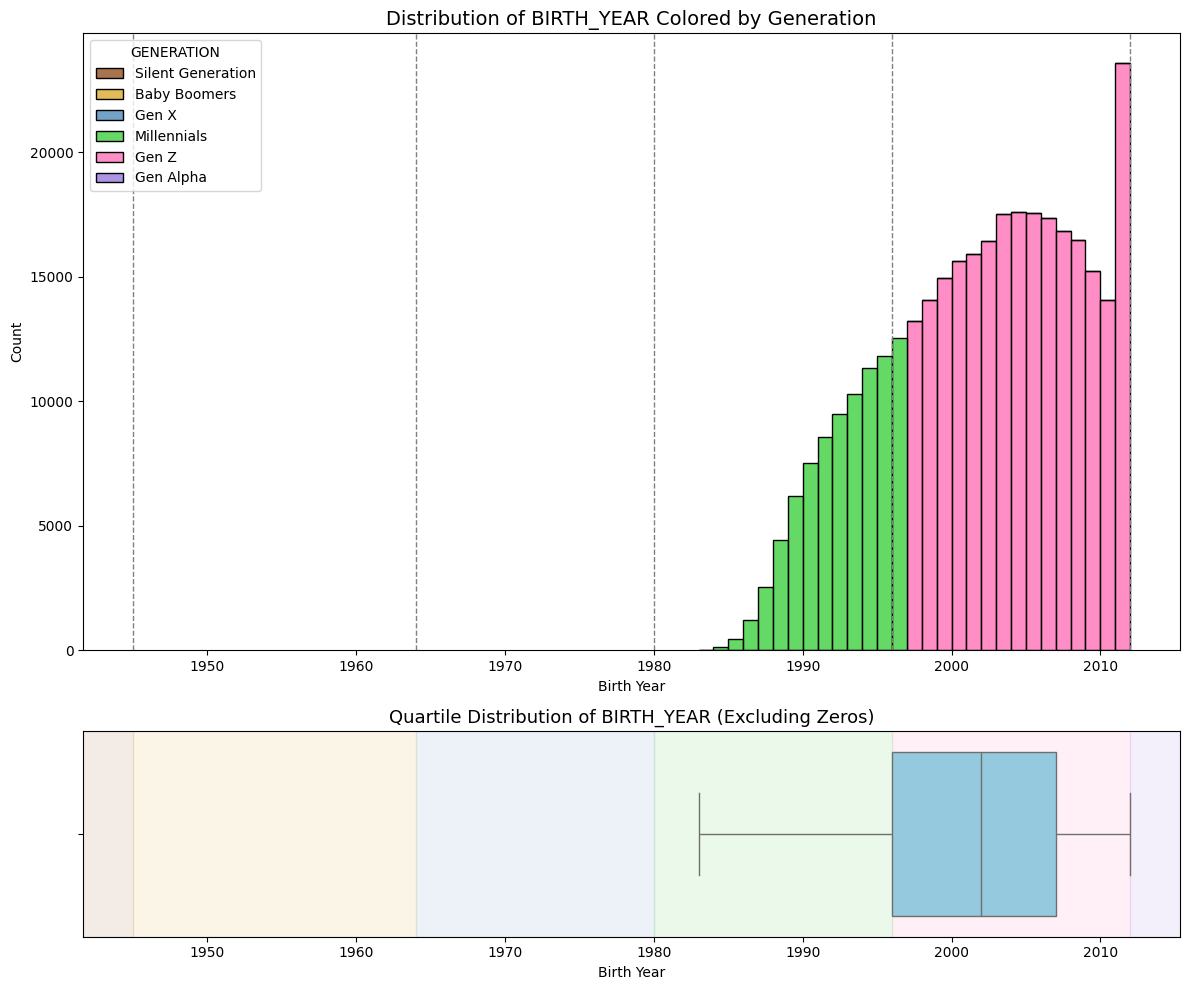

In [ ]:
# Filter valid years
df_valid = df[df['BIRTH_YEAR'] != 0].copy()

# Define generation bins, labels, and colors
generation_bins = [1900, 1945, 1964, 1980, 1996, 2012, 2025]
generation_labels = [
    'Silent Generation',  # 1900–1945
    'Baby Boomers',       # 1946–1964
    'Gen X',              # 1965–1980
    'Millennials',        # 1981–1996
    'Gen Z',              # 1997–2012
    'Gen Alpha'           # 2013–2025
]
generation_colors = {
    'Silent Generation': '#8B4513',
    'Baby Boomers': '#DAA520',
    'Gen X': '#4682B4',
    'Millennials': '#32CD32',
    'Gen Z': '#FF69B4',
    'Gen Alpha': '#9370DB'
}

# Assign generation category
df_valid['GENERATION'] = pd.cut(
    df_valid['BIRTH_YEAR'],
    bins=generation_bins,
    labels=generation_labels,
    right=True
)

# Figure space
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

#  Histogram
years_range = df_valid['BIRTH_YEAR'].max() - df_valid['BIRTH_YEAR'].min()

hist = sns.histplot(
    data=df_valid,
    x='BIRTH_YEAR',
    hue='GENERATION',
    multiple='stack',
    bins=years_range,
    palette=generation_colors,
    ax=ax1
)

ax1.set_title('Distribution of BIRTH_YEAR Colored by Generation', fontsize=14)
ax1.set_xlabel('Birth Year')
ax1.set_ylabel('Count')

# Add vertical lines for generation boundaries
for boundary in generation_bins[1:-1]:
    ax1.axvline(boundary, color='gray', linestyle='--', linewidth=1)

# Boxplot
sns.boxplot(
    data=df_valid,
    x='BIRTH_YEAR',
    ax=ax2,
    color='#87CEEB'
)

ax2.set_title('Quartile Distribution of BIRTH_YEAR (Excluding Zeros)', fontsize=13)
ax2.set_xlabel('Birth Year')

# Generation shading in boxplot for clarity
for i in range(len(generation_bins) - 1):
    ax2.axvspan(
        generation_bins[i], generation_bins[i+1],
        color=generation_colors[generation_labels[i]], alpha=0.1
    )

# Synchronize x-axis for both plots
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.show()

## Factor columns:

- **GENDER_FACTOR**
- **RACE_FACTOR**
- **ETHNICITY_FACTOR**
- **PAYER_FACTOR**
- **ATOPIC_MARCH_COHORT**

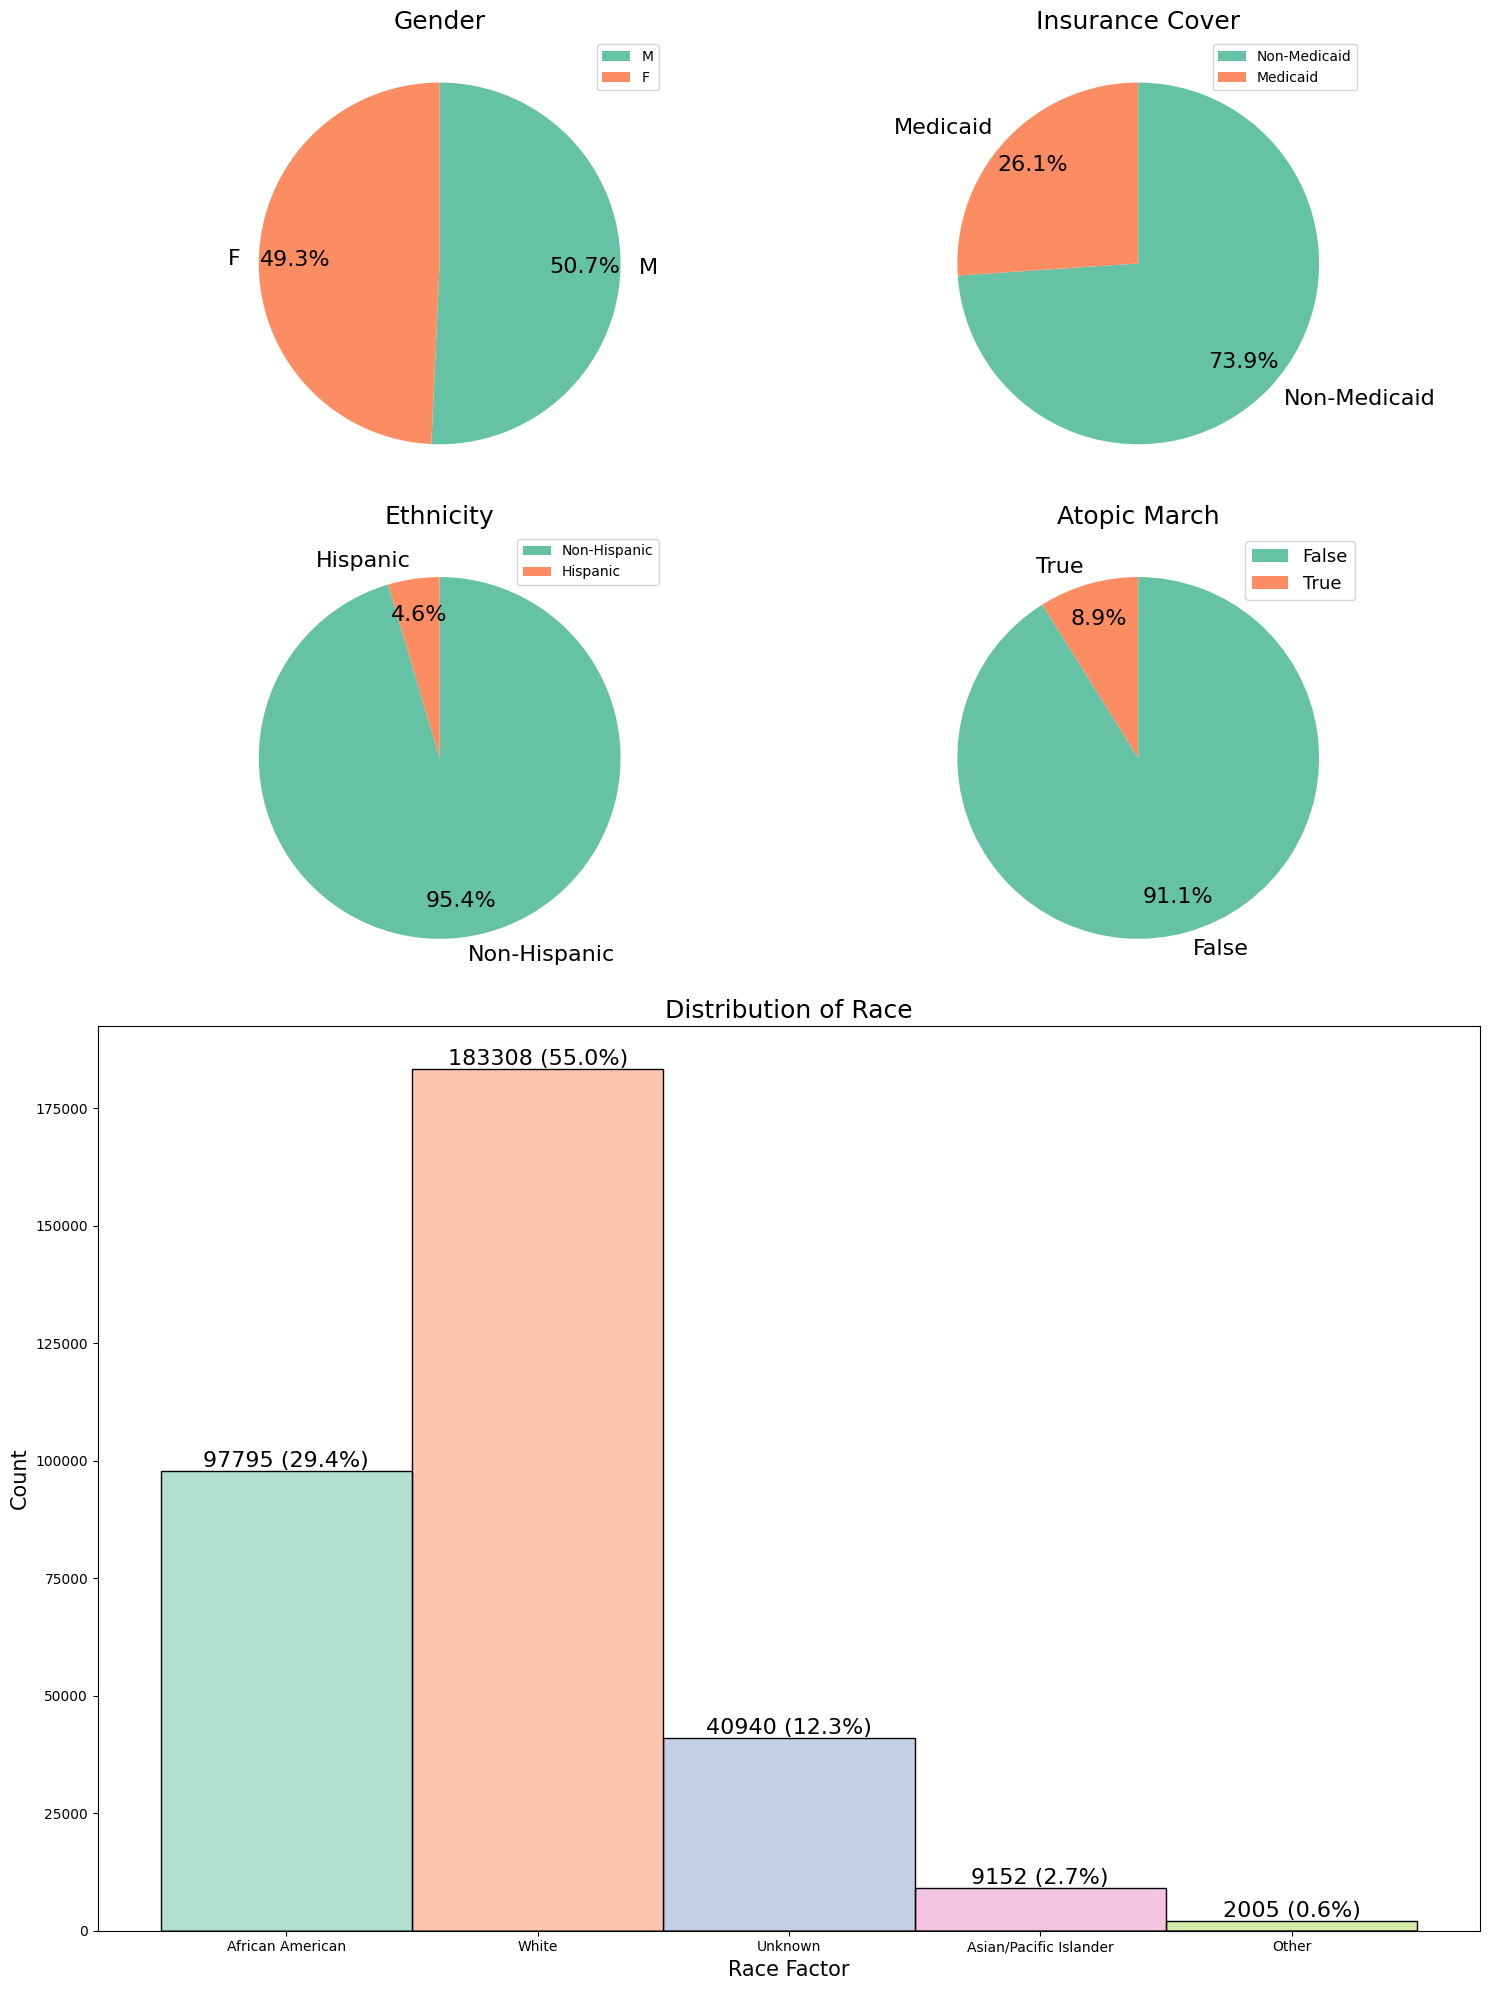

In [19]:
palette = sns.color_palette('Set2')
plt.figure(figsize=(15, 20))

# Create a 3x2 grid for subplots
gs = plt.GridSpec(3, 2, height_ratios=[1, 1, 2])

# ---- Gender ----
ax0 = plt.subplot(gs[0, 0])
data = df['GENDER_FACTOR'].value_counts()
ax0.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax0.set_title('Gender', fontsize=18)
ax0.legend(data.index, loc='best', fontsize=10)

# ---- Insurance Cover ----
ax1 = plt.subplot(gs[0, 1])
data = df['PAYER_FACTOR'].value_counts()
ax1.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax1.set_title('Insurance Cover', fontsize=18)
ax1.legend(data.index, loc='best', fontsize=10)

# ---- Ethnicity ----
ax2 = plt.subplot(gs[1, 0])
data = df['ETHNICITY_FACTOR'].value_counts()
ax2.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax2.set_title('Ethnicity', fontsize=18)
ax2.legend(data.index, loc='best', fontsize=10)

# ---- Atopic March ----
ax3 = plt.subplot(gs[1, 1])
data = df['ATOPIC_MARCH_COHORT'].value_counts()
ax3.pie(
    data,
    labels=data.index,
    startangle=90,
    counterclock=False,
    autopct='%1.1f%%',
    colors=palette[:len(data)],
    pctdistance=0.8,
    labeldistance=1.1,
    textprops={'fontsize': 16}
)
ax3.set_title('Atopic March', fontsize=18)
ax3.legend(data.index, loc='best', fontsize=13)

# ---- Race ----
ax4 = plt.subplot(gs[2, :])
total_count = len(df['RACE_FACTOR'])

hist = sns.histplot(
    data=df,
    x='RACE_FACTOR',
    hue='RACE_FACTOR',
    palette=palette[:len(df['RACE_FACTOR'].value_counts())],
    legend=False,
    ax=ax4
)

ax4.set_title('Distribution of Race', fontsize=18)
ax4.set_xlabel('Race Factor', fontsize=15)
ax4.set_ylabel('Count', fontsize=15)

for container in hist.containers:
    counts = [rect.get_height() for rect in container]
    percentages = [count / total_count * 100 for count in counts]

    labels = []
    for count, perc in zip(counts, percentages):
        if count > 0:
            labels.append(f'{int(count)} ({perc:.1f}%)')
        else:
            labels.append('')

    hist.bar_label(container, labels=labels, fontsize=16)

plt.tight_layout()
plt.show()


In [20]:
allergy_names = sorted({
    '_'.join(col.split('_')[:-1]).replace('_', ' ')
    for col in df.columns
    if col.endswith(('START', 'END'))
})

print(f"There are {len(allergy_names)} types of allergies in this study:\n\t- " + "\n\t- ".join(allergy_names))

There are 19 types of allergies in this study:
	- ALLERGIC RHINITIS
	- ALMOND ALG
	- ASTHMA
	- ATOPIC DERM
	- BRAZIL ALG
	- CASHEW ALG
	- EGG ALG
	- FISH ALG
	- HAZELNUT ALG
	- MILK ALG
	- PEANUT ALG
	- PECAN ALG
	- PISTACH ALG
	- SESAME ALG
	- SHELLFISH ALG
	- SOY ALG
	- TREENUT ALG
	- WALNUT ALG
	- WHEAT ALG


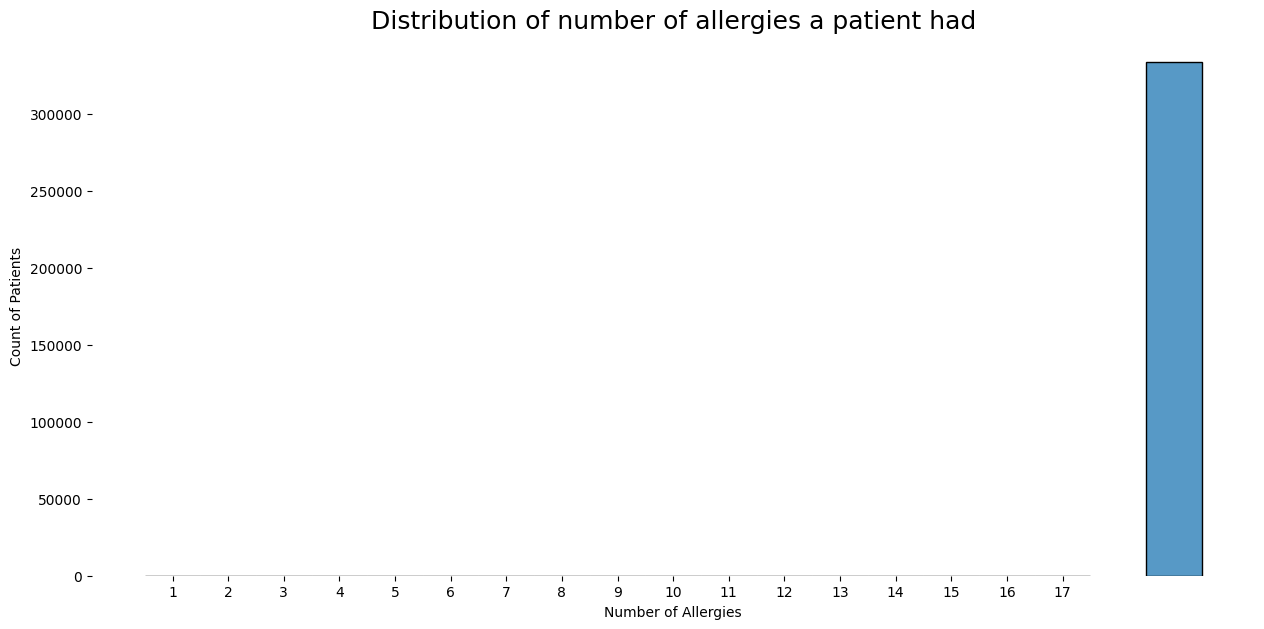

In [21]:
allergy_cols = [x for x in df.columns if x.endswith('START') or x.endswith('END')]
allergy_presence = (df[allergy_cols] != 0.0)
allergy_names_map = {col: ' '.join(col.split('_')[:-1]) for col in allergy_cols}

has_allergy_matrix = (allergy_presence.rename(columns=allergy_names_map).T.groupby(level=0).max().T.astype(int)) 
has_allergy = pd.concat([df['SUBJECT_ID'], has_allergy_matrix], axis=1)
data = has_allergy.drop(columns='SUBJECT_ID').sum(axis=1)

# --- Plotting ---
plt.figure(figsize=(15, 7))
ax = sns.histplot(data, binwidth=1)
bin_centers = [i + 0.5 for i in range(0, 17)]
bin_labels = list(range(1, 18))
plt.xticks(ticks=bin_centers, labels=bin_labels)

counts, bins, patches = ax.hist(data, bins=range(0, 18), edgecolor='black')
for rect, count in zip(patches, counts):
    if count > 0:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2,
            height + 0.02*max(counts),
            str(int(count)),
            ha='center',
            fontsize=10
        )

plt.box(False)
plt.title('Distribution of number of allergies a patient had', fontsize=18)
plt.xlabel('Number of Allergies')
plt.ylabel('Count of Patients')
plt.show()

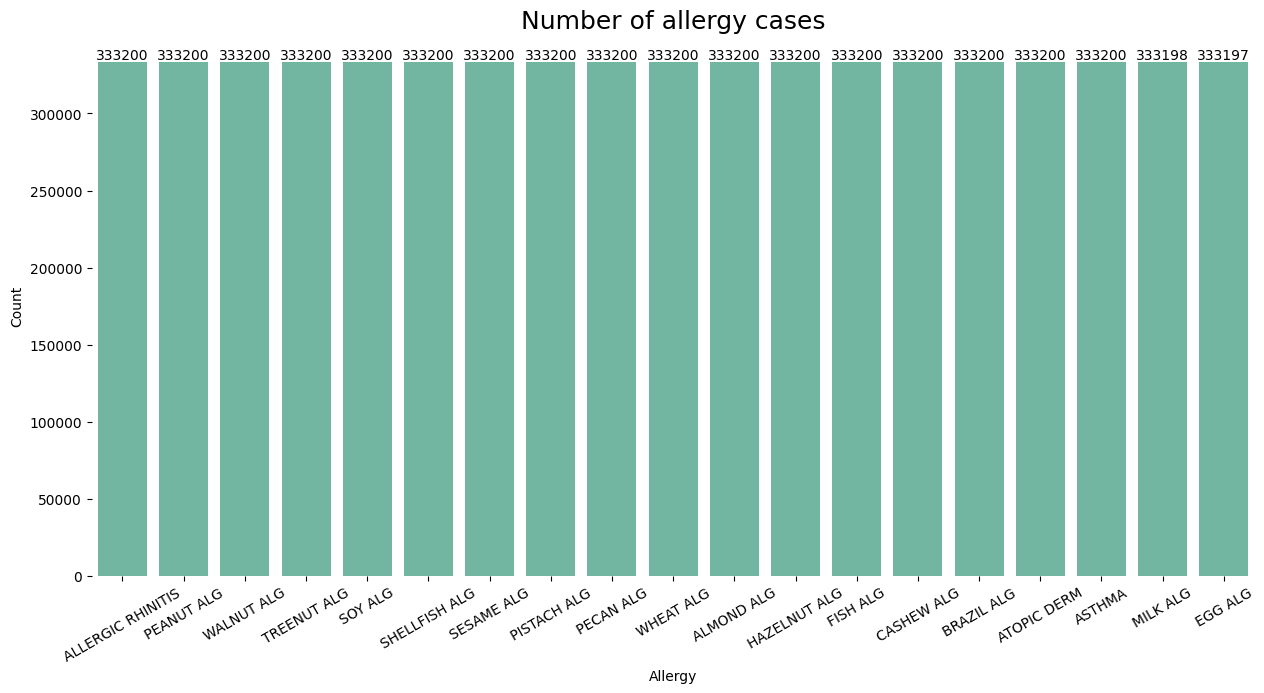

In [22]:
allergy_summary = has_allergy.drop(columns=['SUBJECT_ID'])
allergy_summary = allergy_summary.sum().sort_values(ascending=False).reset_index()
allergy_summary.columns = ['Allergy', 'Count']

# --- Plotting ---
plt.figure(figsize=(15, 7))
bp = sns.barplot(x='Allergy', y='Count', data=allergy_summary, color=palette[0])

for bar in bp.patches:
    height = bar.get_height()
    bp.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=30)
plt.title('Number of allergy cases', fontsize=18)
plt.box(False)
plt.show()


## Allergy Age START vs. END distribution

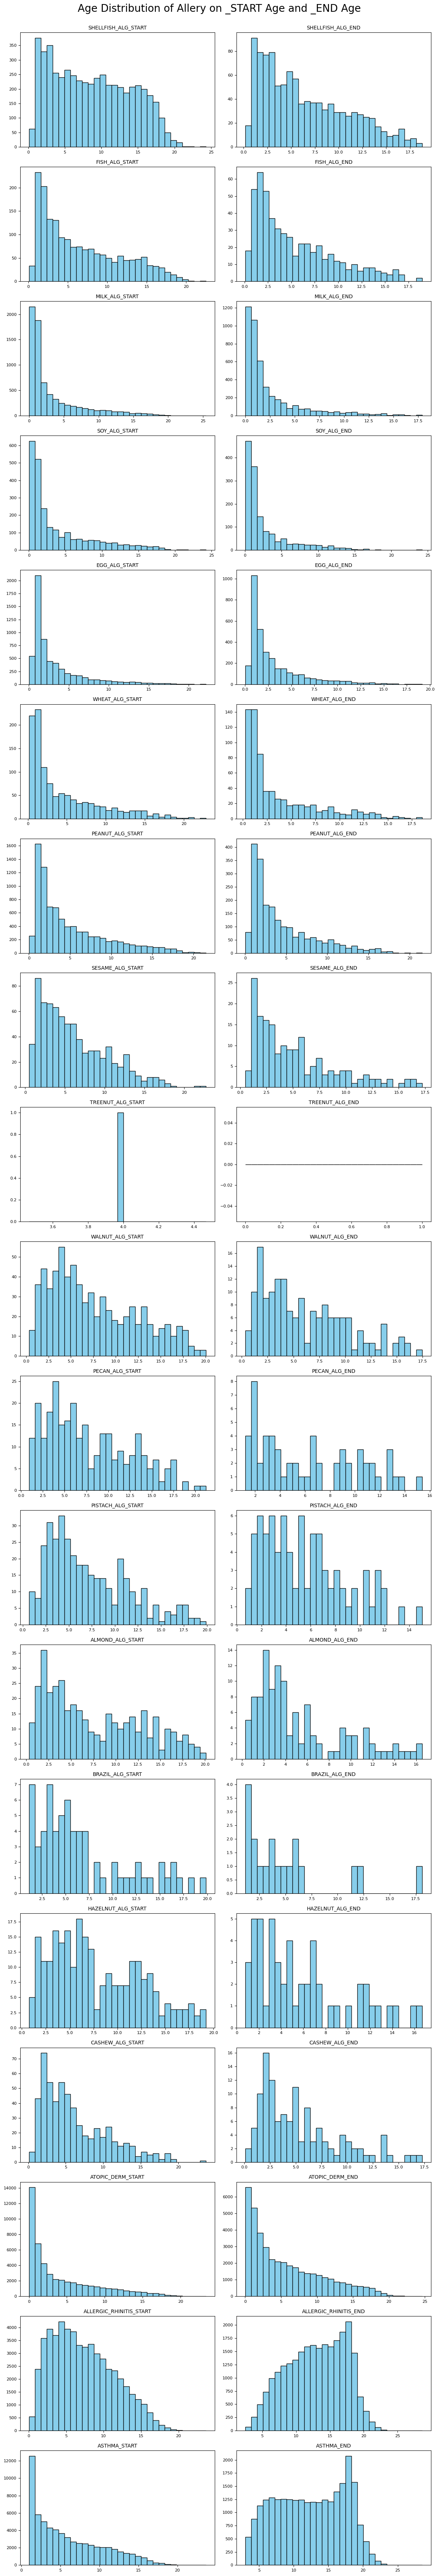

In [23]:
# Filter numeric columns that end with _START or _END
numeric_df = df.select_dtypes(include=['float64', 'int64'])
start_end_cols = [col for col in numeric_df.columns if col.endswith('_START') or col.endswith('_END')]
positive_df = numeric_df[start_end_cols][numeric_df[start_end_cols] > 0]

# --- Histograms ---
# 2 plots per row
n_vars = len(start_end_cols)
ncols = 2
nrows = int(np.ceil(n_vars / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.ravel()

for idx, column in enumerate(start_end_cols):
    ax = axes[idx]
    data = positive_df[column]
    data.hist(
        ax=ax,
        bins=30,
        color='skyblue',
        edgecolor='black',
        grid=False
    )
    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# Hide empty subplots
for idx in range(n_vars, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Age Distribution of Allery on _START Age and _END Age', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Allergic Rhinitis

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| ALLERGIC_RHINITIS_START | Allergic rhinitis status at the start of the study.  | FLOAT64 |
| ALLERGIC_RHINITIS_END   | Allergic rhinitis status at the end of the study.    | FLOAT64 |

<!-- ![Allergic Rhinitis](./imgs/AllergicRhinitis.webp) -->

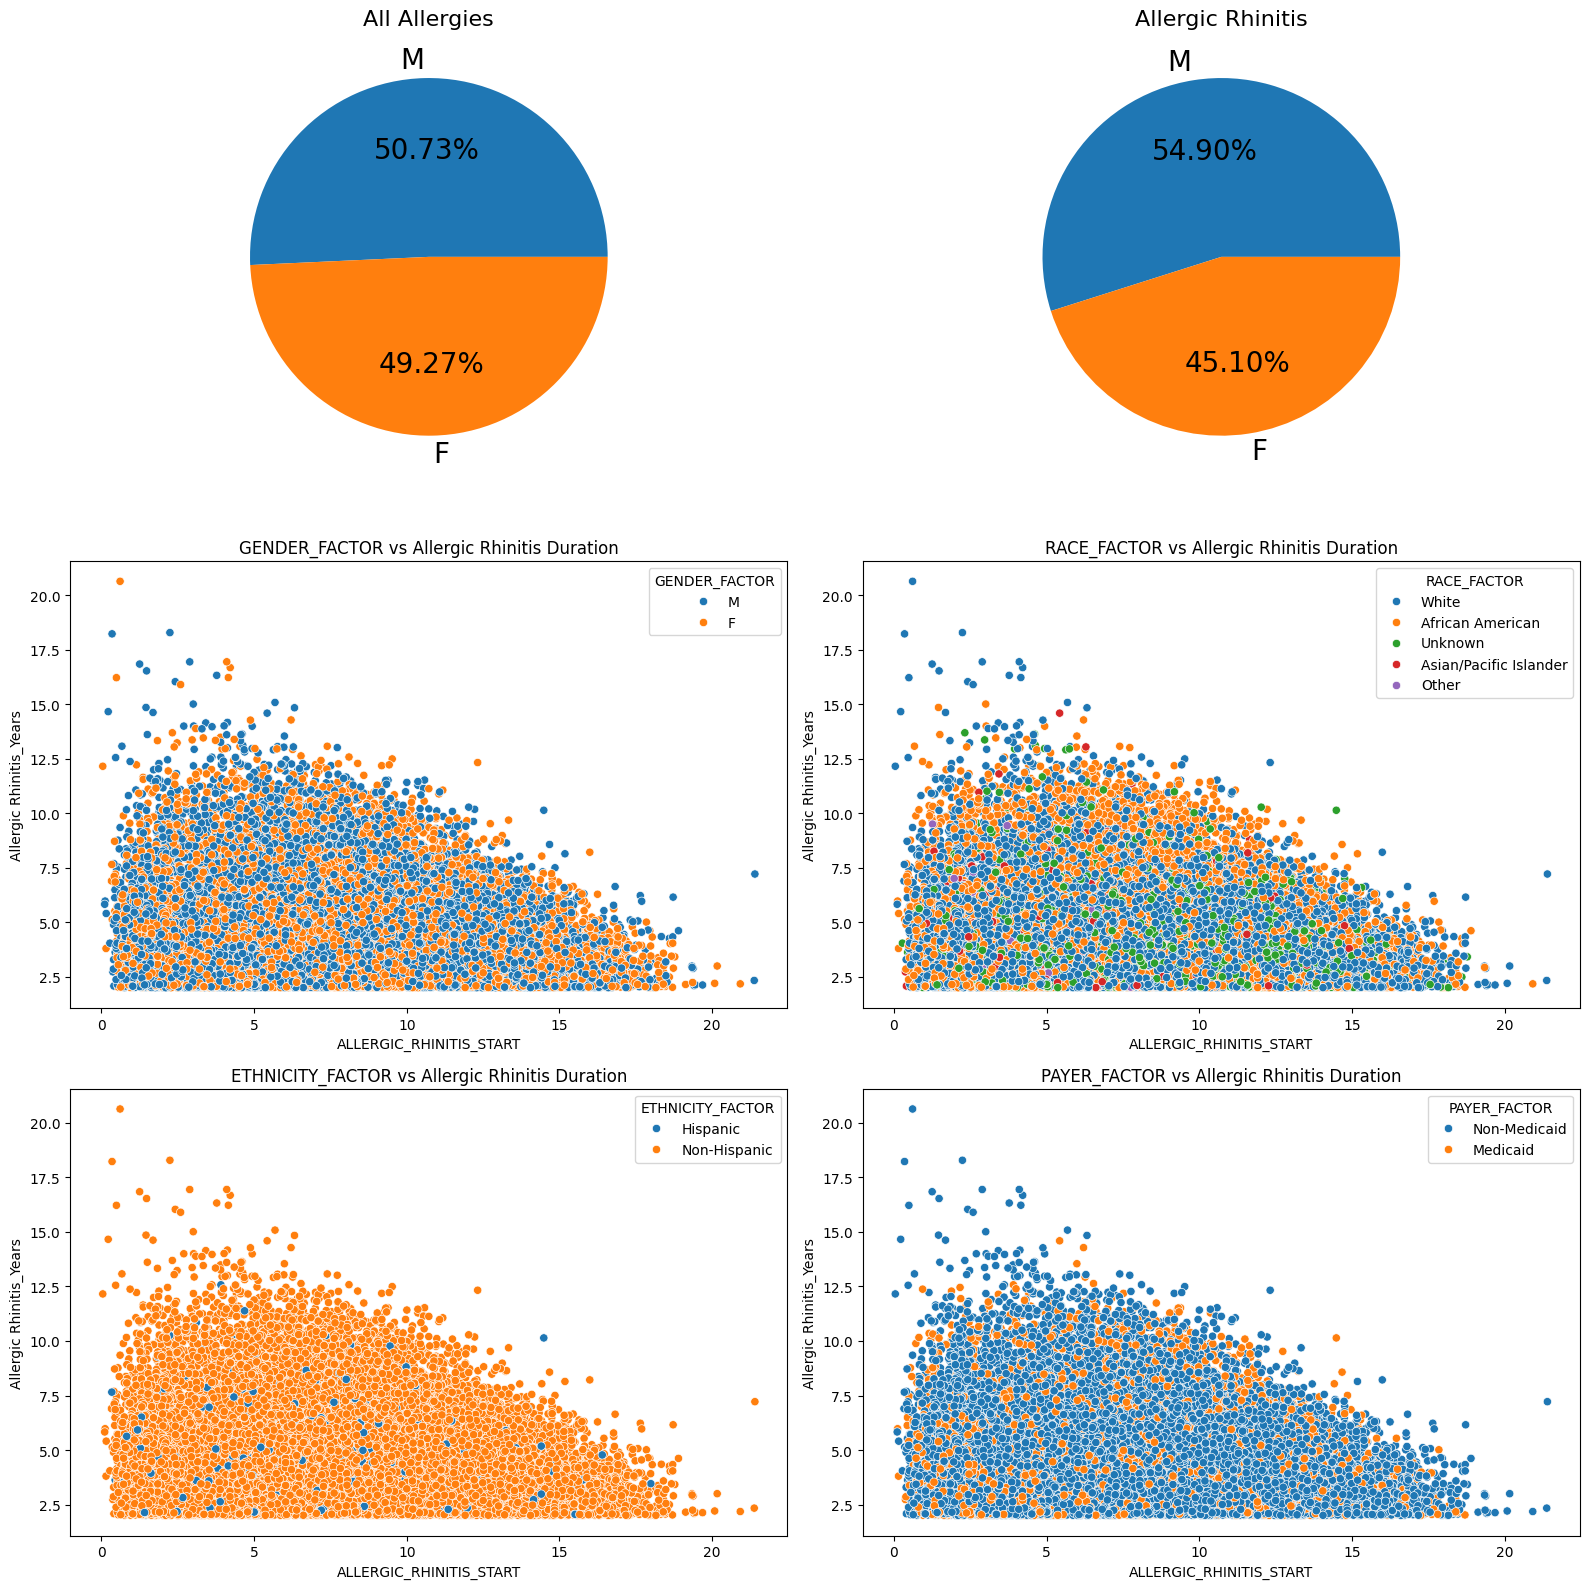

In [24]:
plot_allergy(df, 'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', allergy_name="Allergic Rhinitis")

# Almond Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| ALMOND_ALG_START        | Almond allergy status at the start of the study.     | FLOAT64 |
| ALMOND_ALG_END          | Almond allergy status at the end of the study.       | FLOAT64 |

<!-- <img src="./imgs/AlmondAllergy.png" alt="Almond Allergy" width="500"> -->


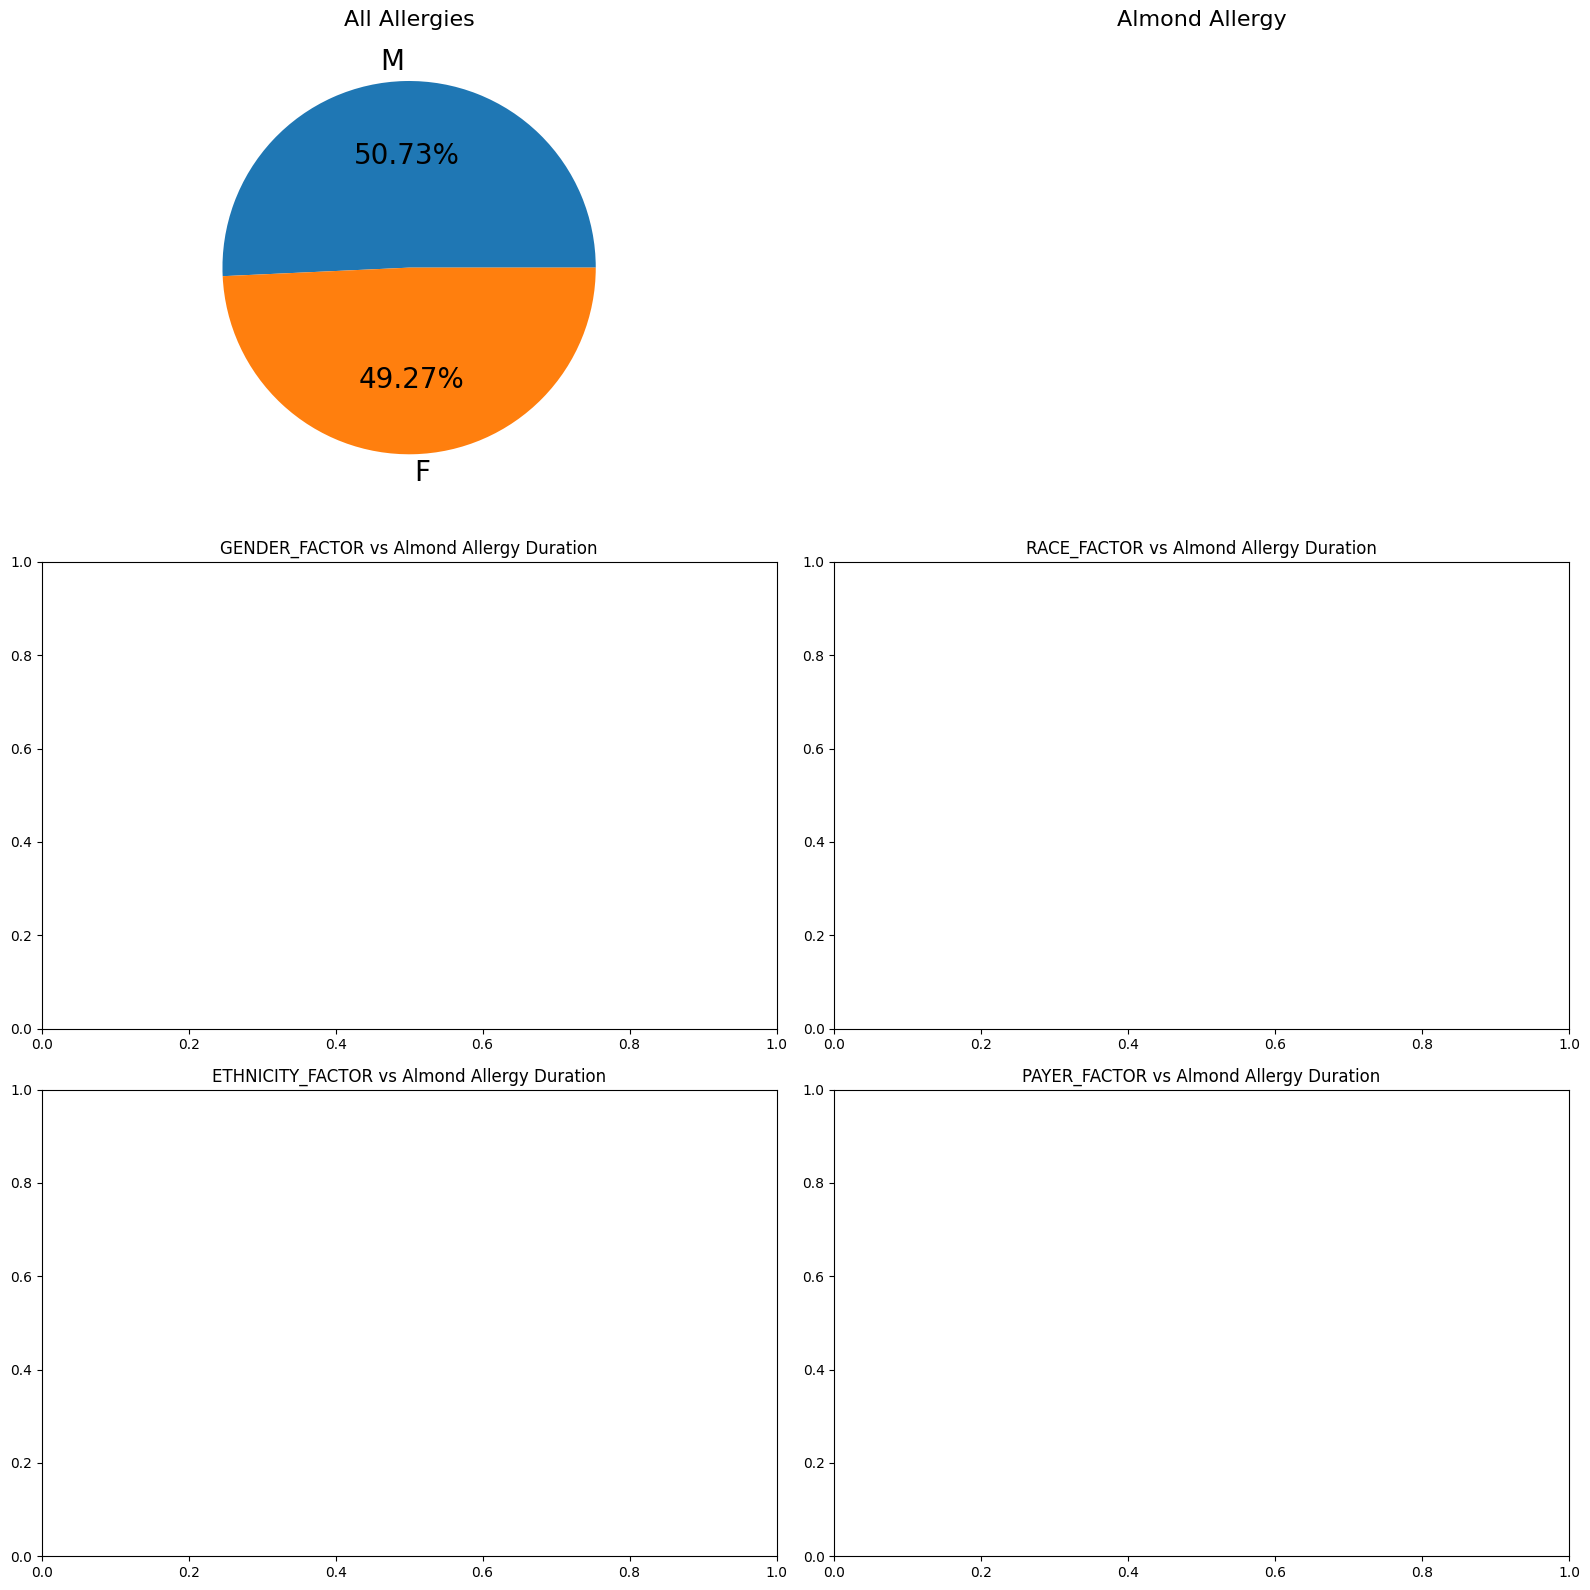

In [25]:
plot_allergy(df, 'ALMOND_ALG_START', 'ALMOND_ALG_END', allergy_name="Almond Allergy")

# Asthma Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| ASTHMA_START            | Asthma status at the start of the study.             | FLOAT64 |
| ASTHMA_END              | Asthma status at the end of the study.               | FLOAT64 |

<!-- ![Shellfish Allergy](./imgs/ShellfishAllergy.jpg) -->

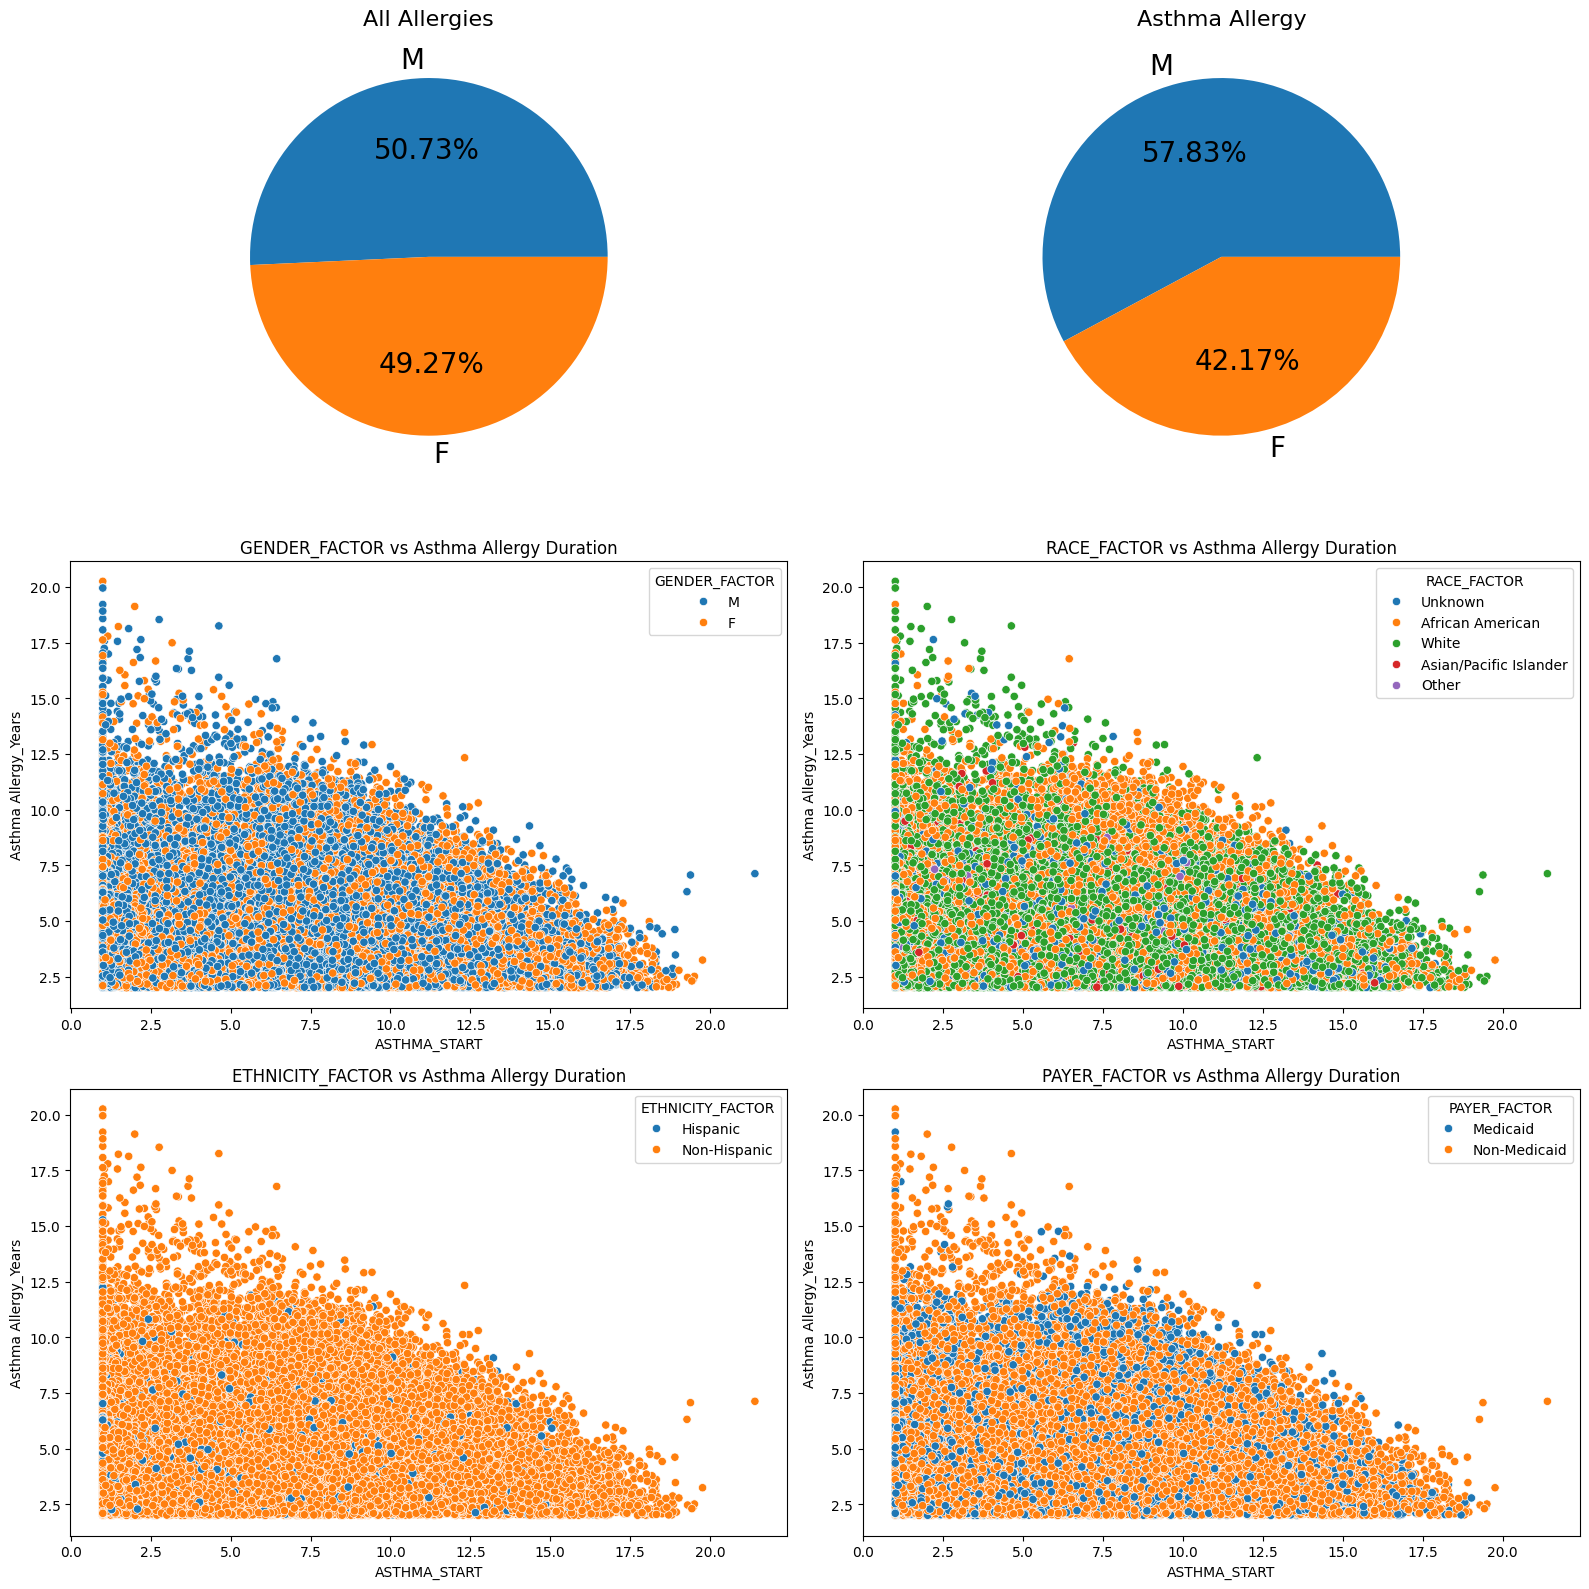

In [26]:
plot_allergy(df, 'ASTHMA_START', 'ASTHMA_END', allergy_name="Asthma Allergy")

# Atopic Dermatitis

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| ATOPIC_DERM_START       | Atopic dermatitis status at the start of the study.  | FLOAT64 |
| ATOPIC_DERM_END         | Atopic dermatitis status at the end of the study.    | FLOAT64 |

<!-- ![Atopic Dermatitis](./imgs/AtopicDermatitis.jpeg) -->

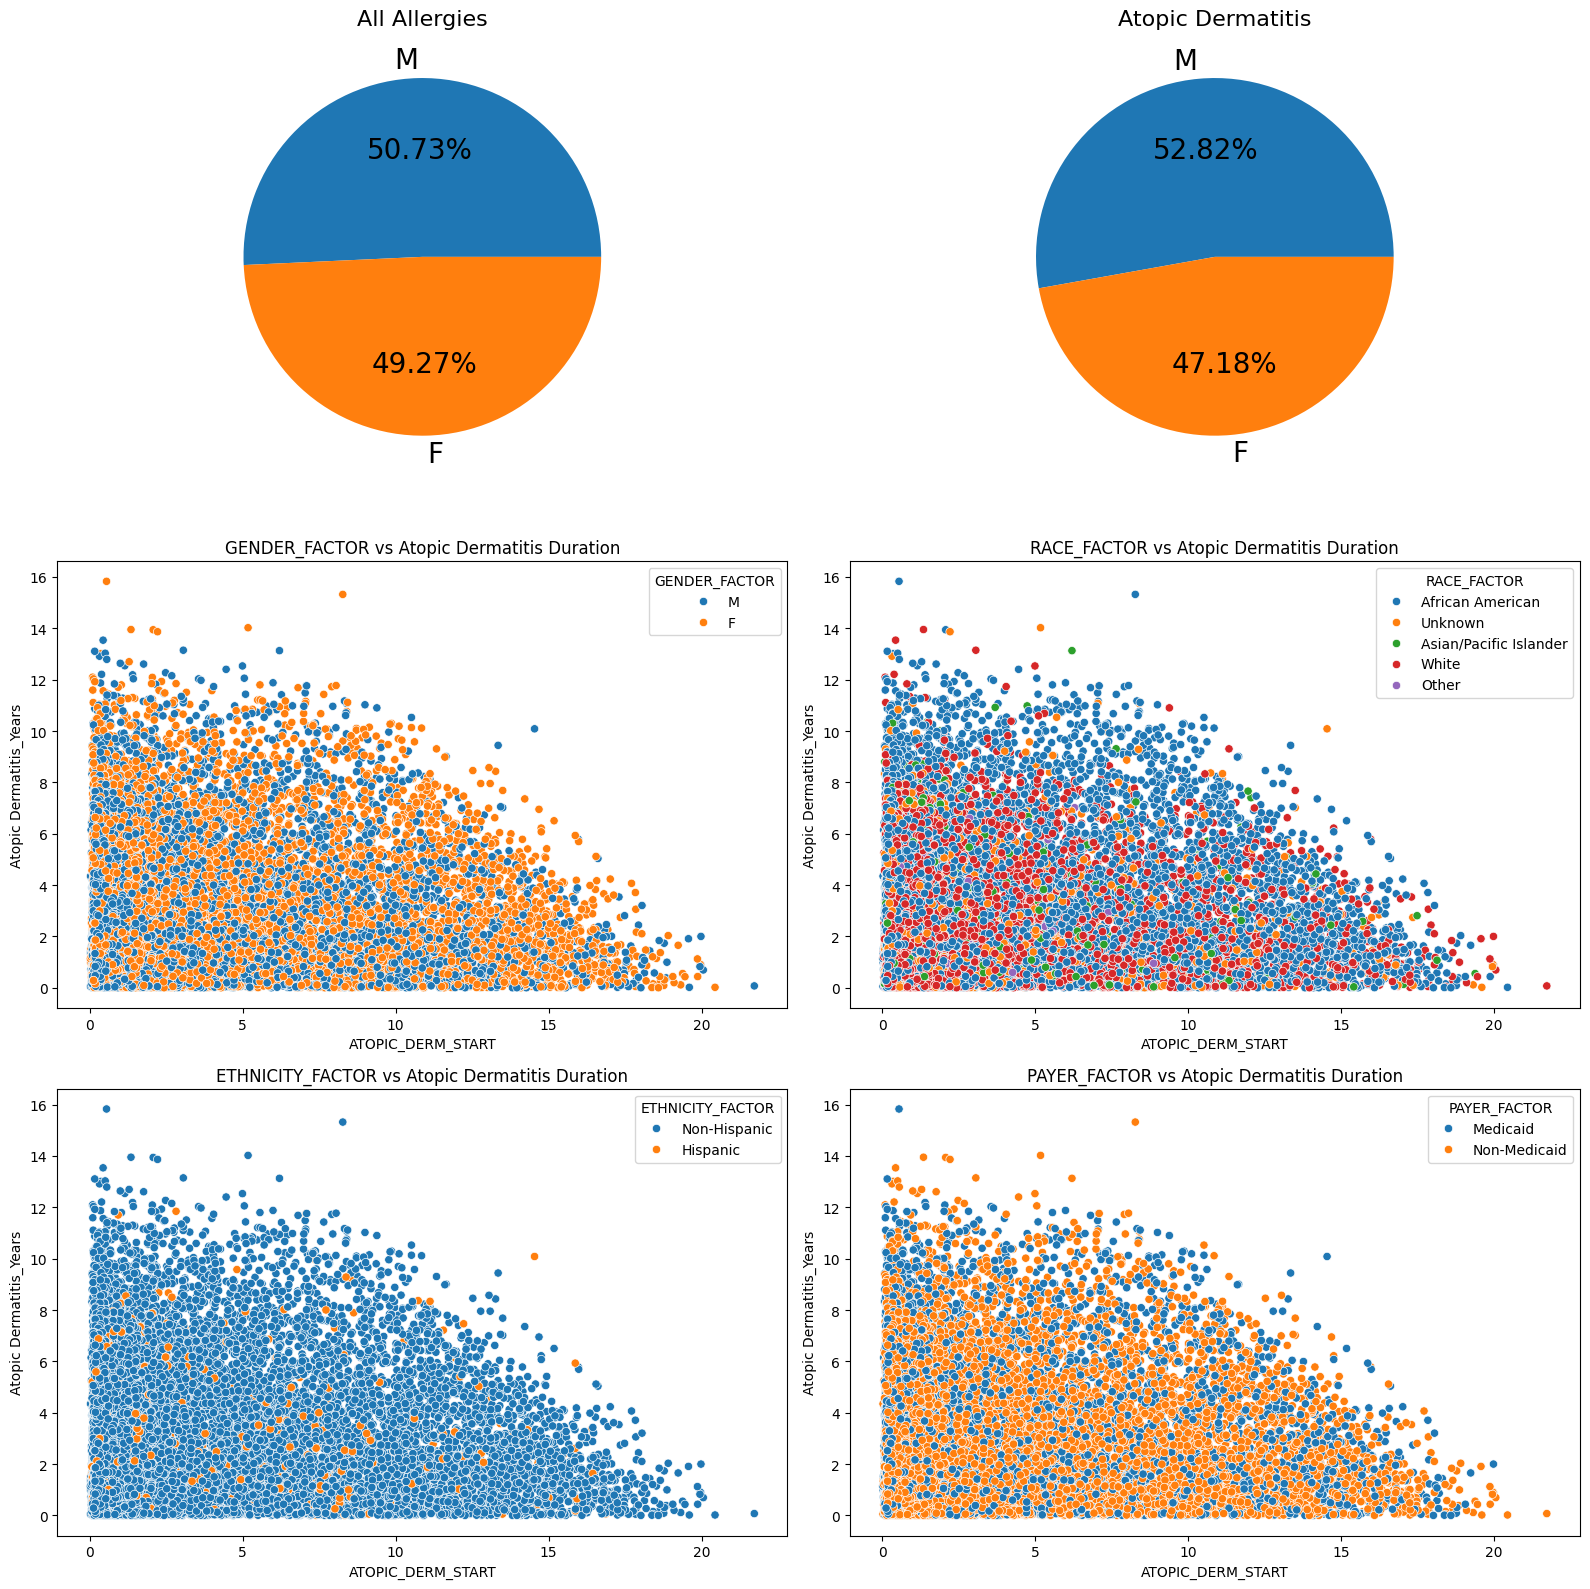

In [27]:
plot_allergy(df, 'ATOPIC_DERM_START', 'ATOPIC_DERM_END', allergy_name="Atopic Dermatitis")

# Brazil Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| BRAZIL_ALG_START        | Brazil nut allergy status at the start of the study. | FLOAT64 |
| BRAZIL_ALG_END          | Brazil nut allergy status at the end of the study.   | FLOAT64 |

<!-- ![Brazil Allergy](./imgs/BrazilAllergy.jpeg) -->

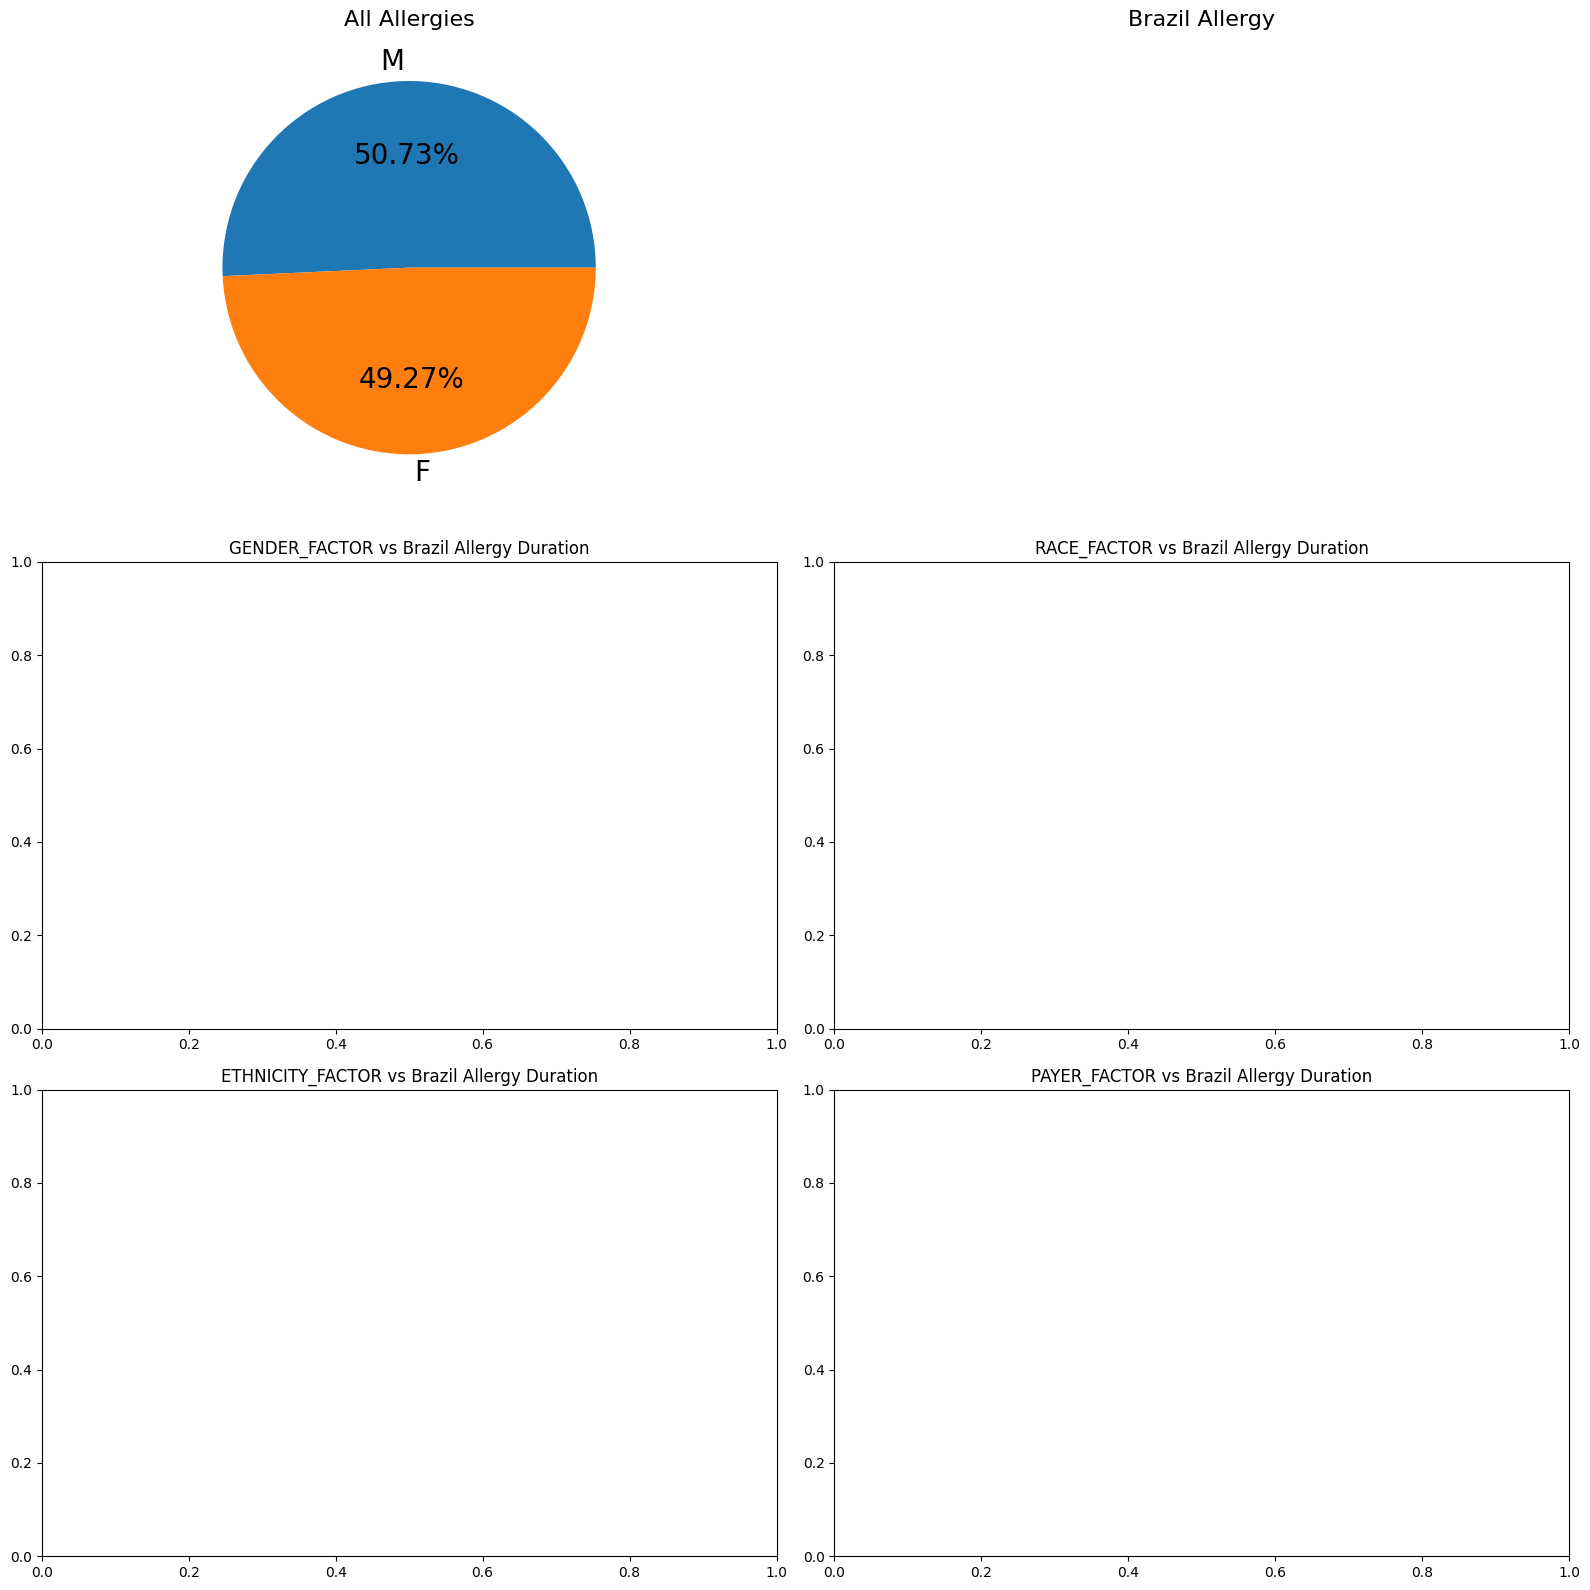

In [28]:
plot_allergy(df, 'BRAZIL_ALG_START', 'BRAZIL_ALG_END', allergy_name="Brazil Allergy")

# Cashew Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| CASHEW_ALG_START        | Cashew allergy status at the start of the study.     | FLOAT64 |
| CASHEW_ALG_END          | Cashew allergy status at the end of the study.       | FLOAT64 |

<!-- ![Cashew Allergy](./imgs/CashewAllergy.jpeg) -->

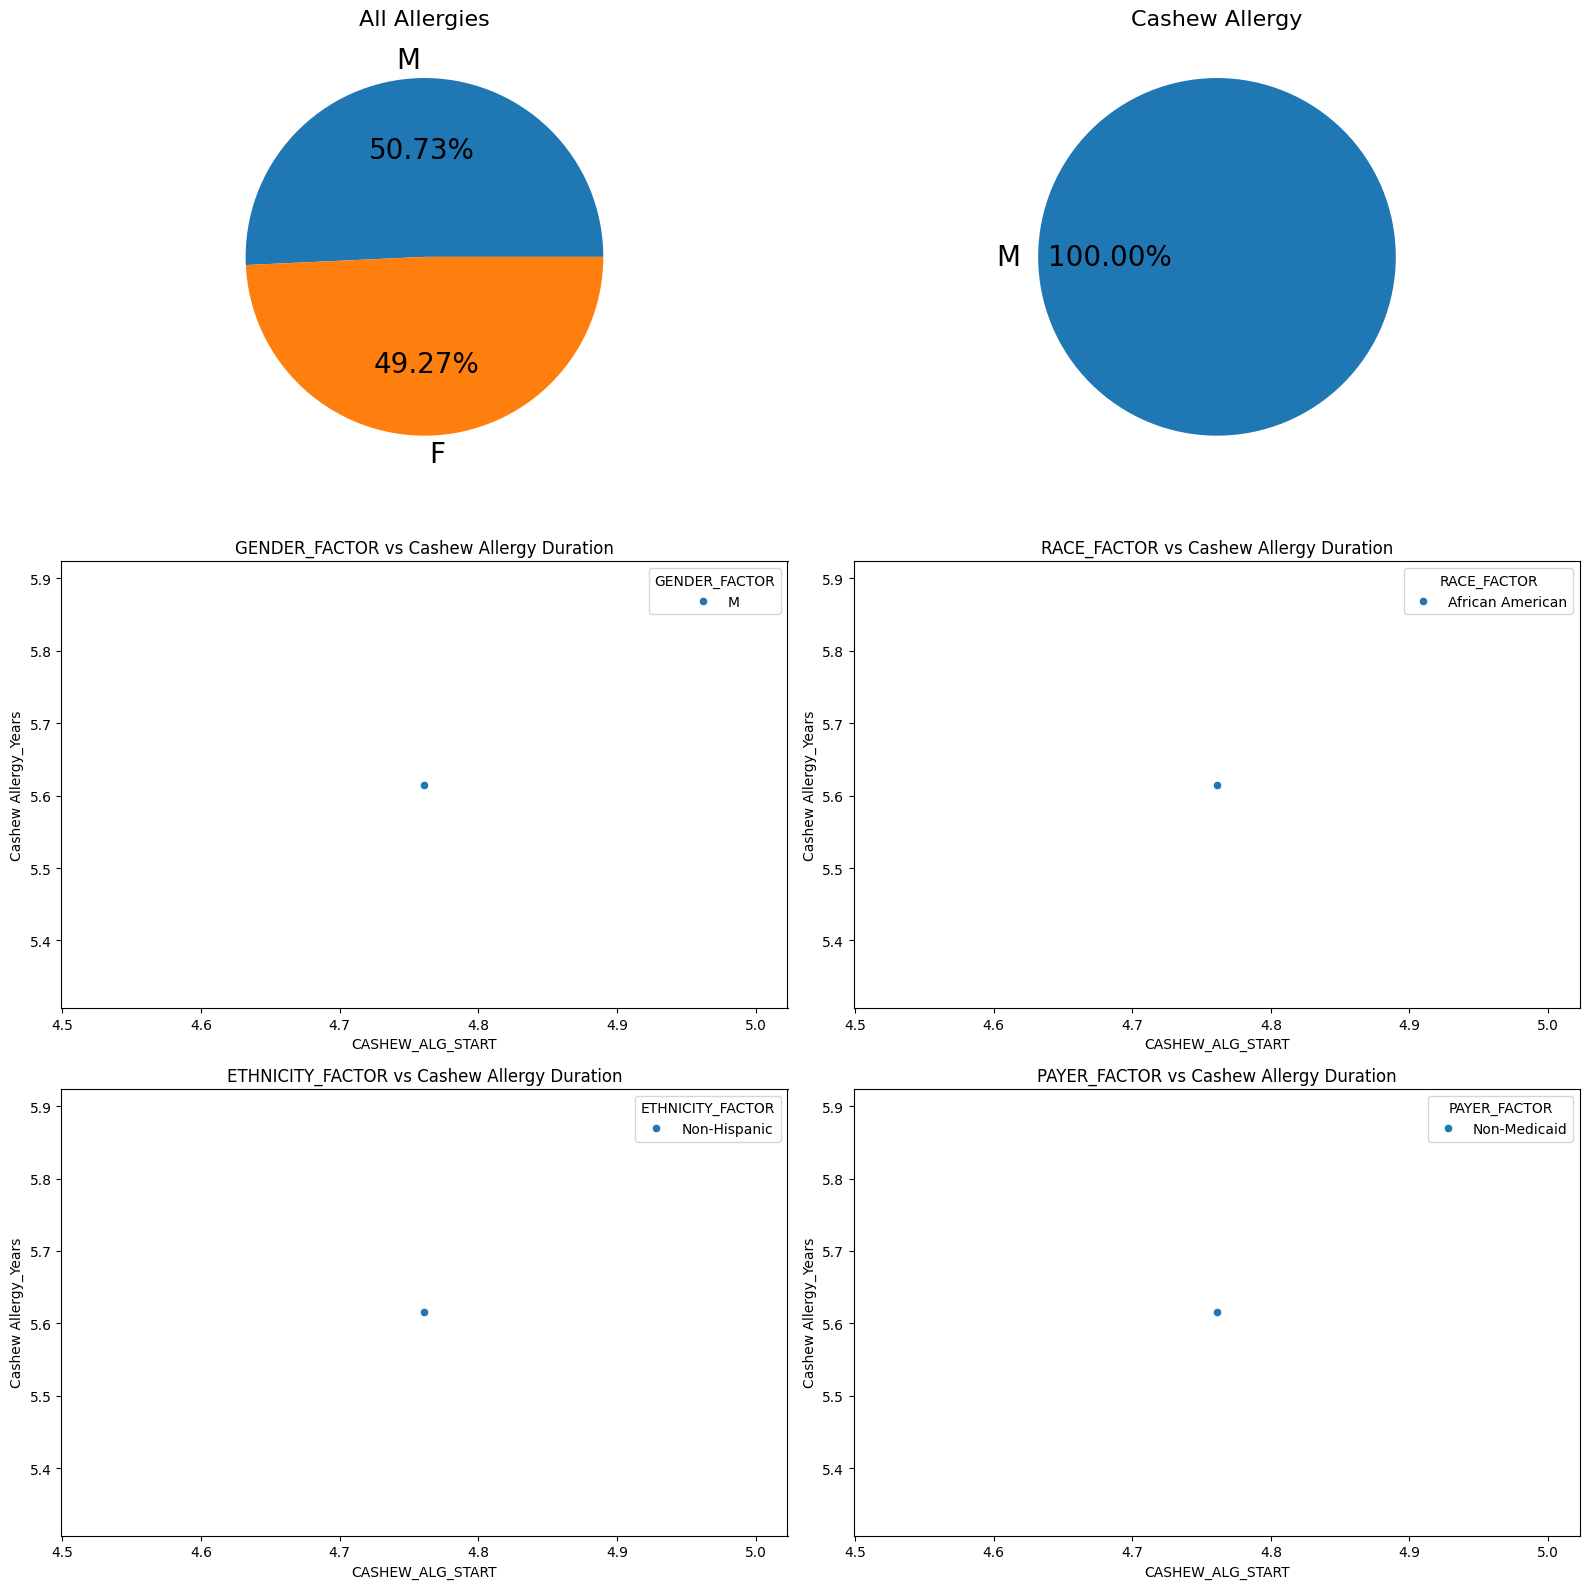

In [29]:
plot_allergy(df, 'CASHEW_ALG_START', 'CASHEW_ALG_END', allergy_name="Cashew Allergy")

# Egg Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| EGG_ALG_START           | Egg allergy status at the start of the study.        | FLOAT64 |
| EGG_ALG_END             | Egg allergy status at the end of the study.          | FLOAT64 |

<!-- ![Egg Allergy](./imgs/EggAllergy.jpeg) -->

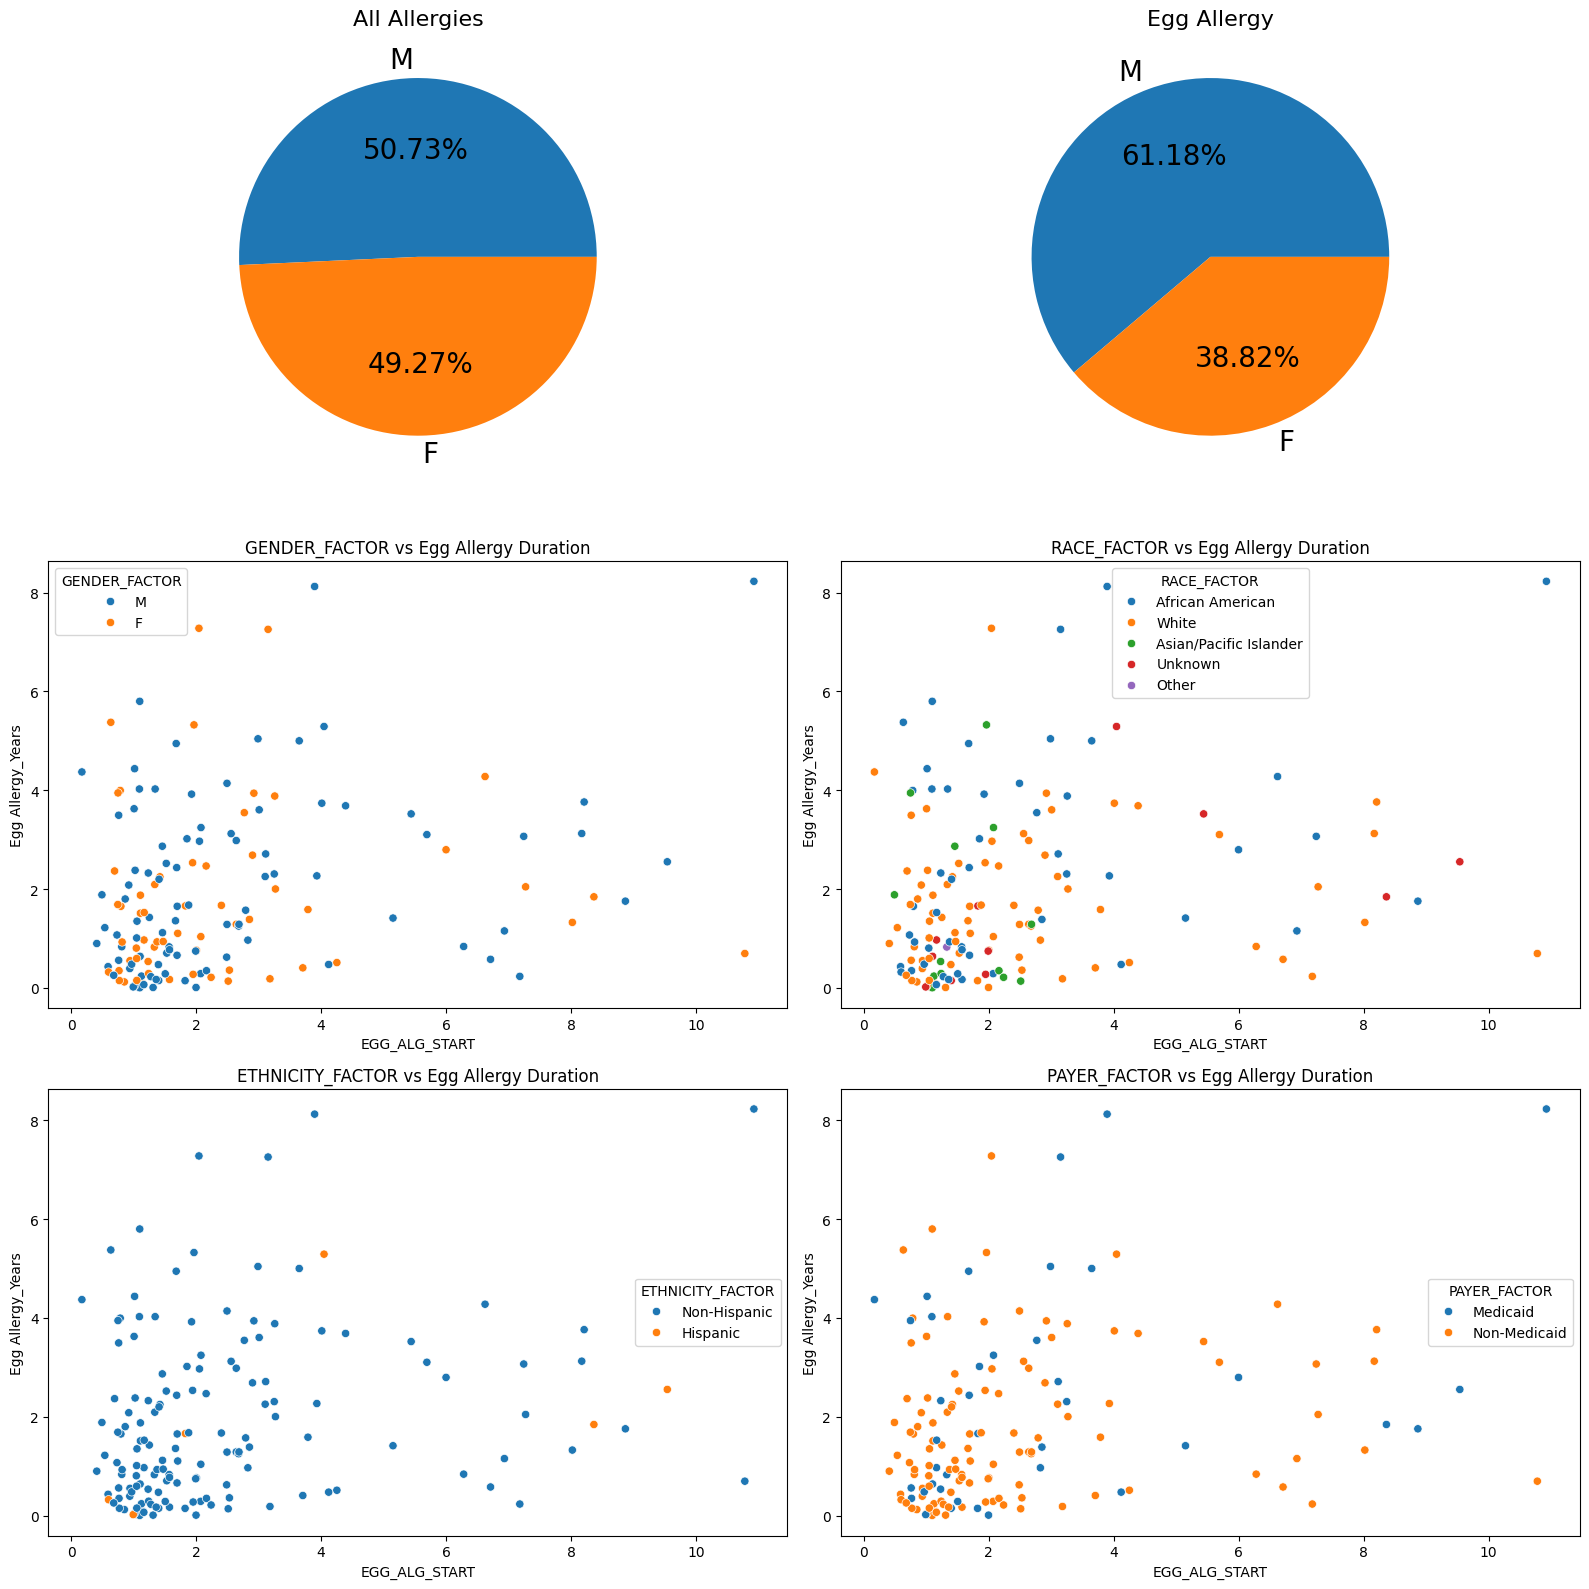

In [30]:
plot_allergy(df, 'EGG_ALG_START', 'EGG_ALG_END', allergy_name="Egg Allergy")

# Fish allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| FISH_ALG_START          | Fish allergy status at the start of the study.       | FLOAT64 |
| FISH_ALG_END            | Fish allergy status at the end of the study.         | FLOAT64 |

<!-- ![Fish Allergy](./imgs/FishAllergy.jpeg) -->

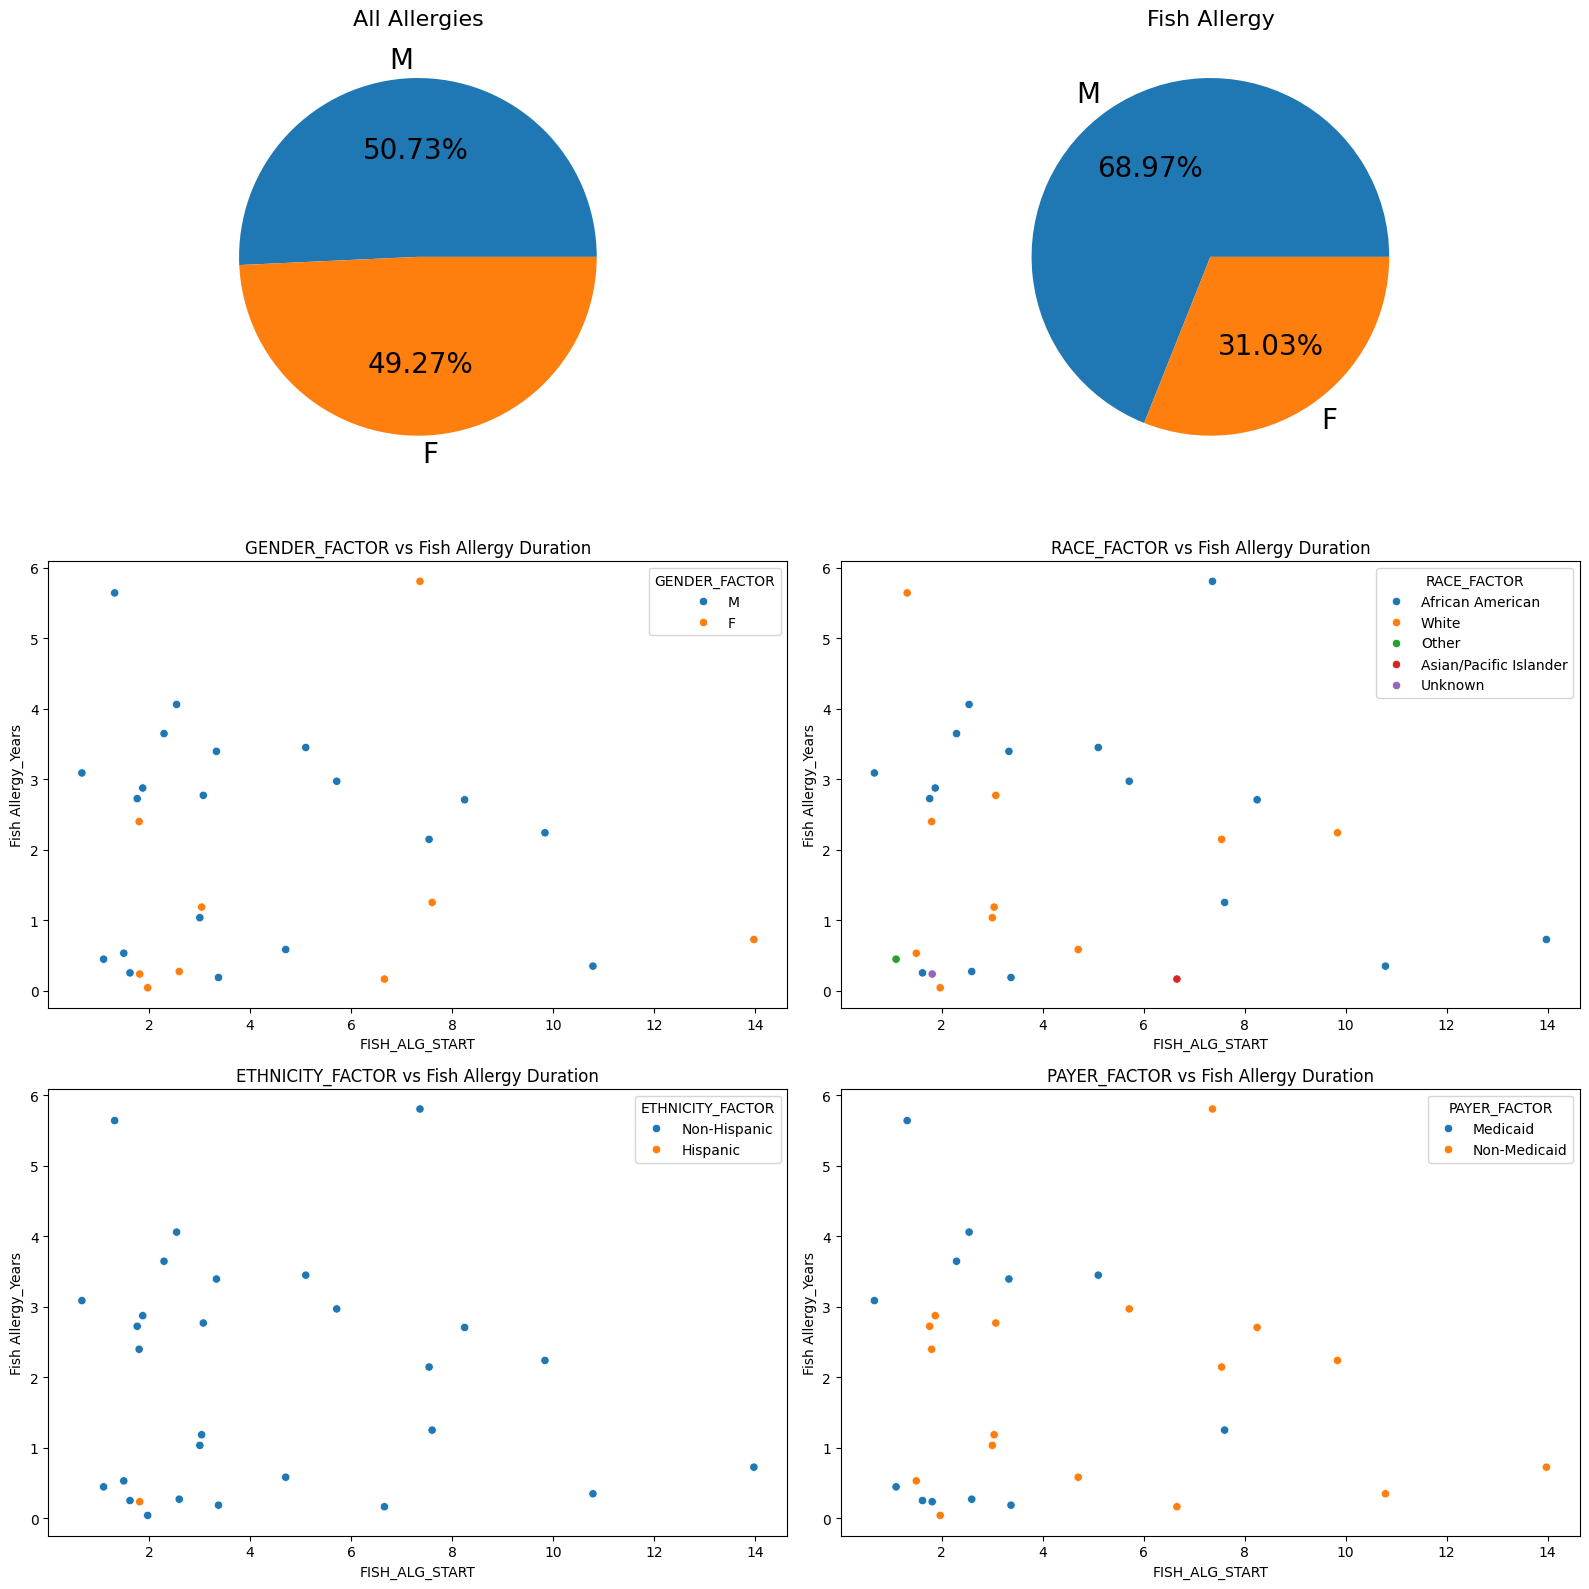

In [31]:
plot_allergy(df, 'FISH_ALG_START', 'FISH_ALG_END', allergy_name="Fish Allergy")

# Hazelnut allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| HAZELNUT_ALG_START      | Hazelnut allergy status at the start of the study.   | FLOAT64 |
| HAZELNUT_ALG_END        | Hazelnut allergy status at the end of the study.     | FLOAT64 |

<!-- ![Hazelnut Allergy](./imgs/HazelnutAllergy.jpeg) -->

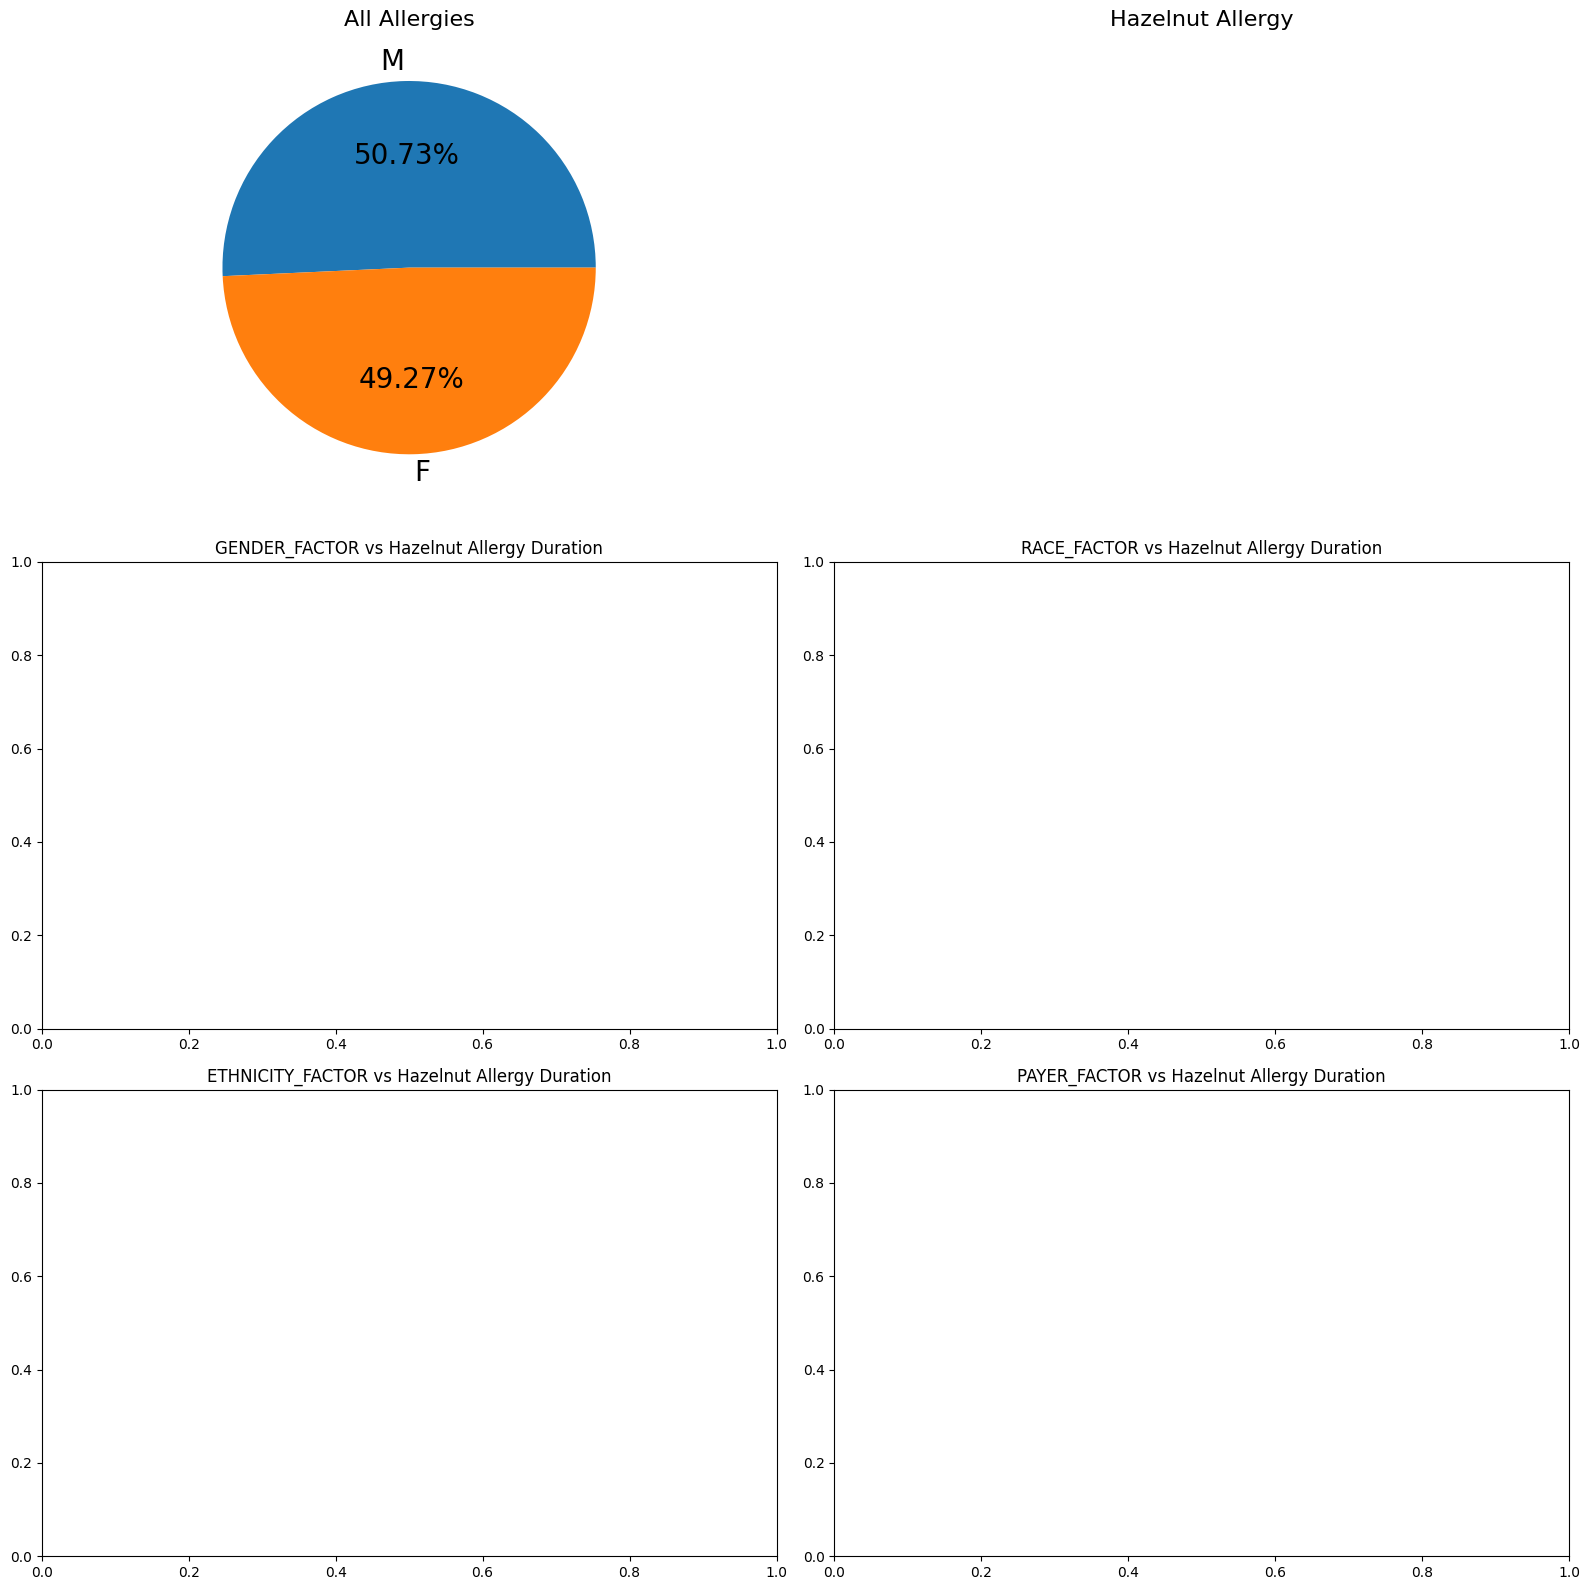

In [32]:
plot_allergy(df, 'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', allergy_name="Hazelnut Allergy")

# Milk allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| MILK_ALG_START          | Milk allergy status at the start of the study.       | FLOAT64 |
| MILK_ALG_END            | Milk allergy status at the end of the study.         | FLOAT64 |

<!-- ![Milk Allergy](./imgs/MilkAllergy.jpeg) -->

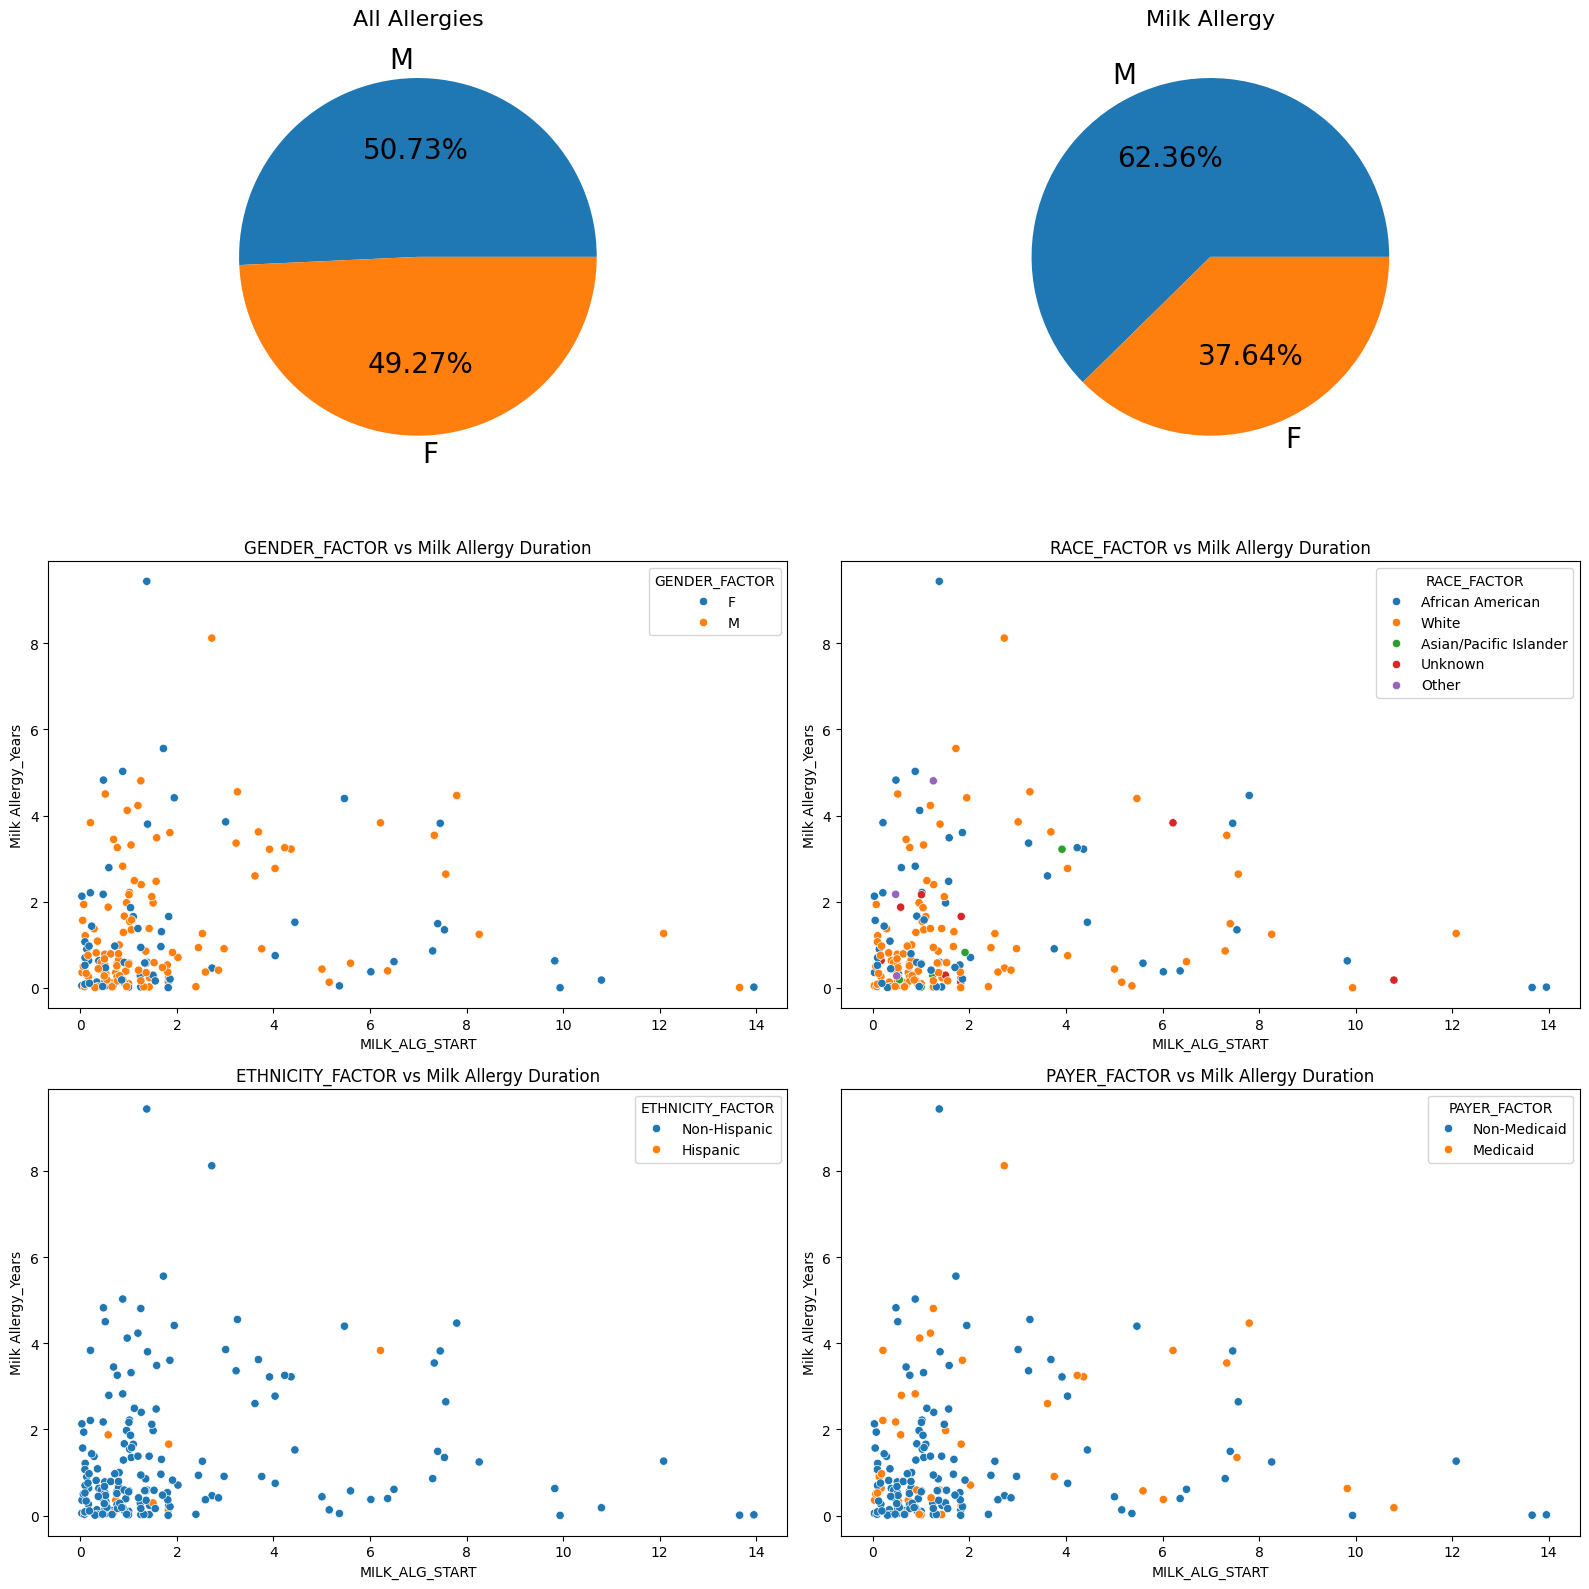

In [33]:
plot_allergy(df, 'MILK_ALG_START', 'MILK_ALG_END', allergy_name="Milk Allergy")

# Peanut allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| PEANUT_ALG_START        | Peanut allergy status at the start of the study.     | FLOAT64 |
| PEANUT_ALG_END          | Peanut allergy status at the end of the study.       | FLOAT64 |

<!-- ![Peanut Allergy](./imgs/PeanutAllergy.jpeg) -->

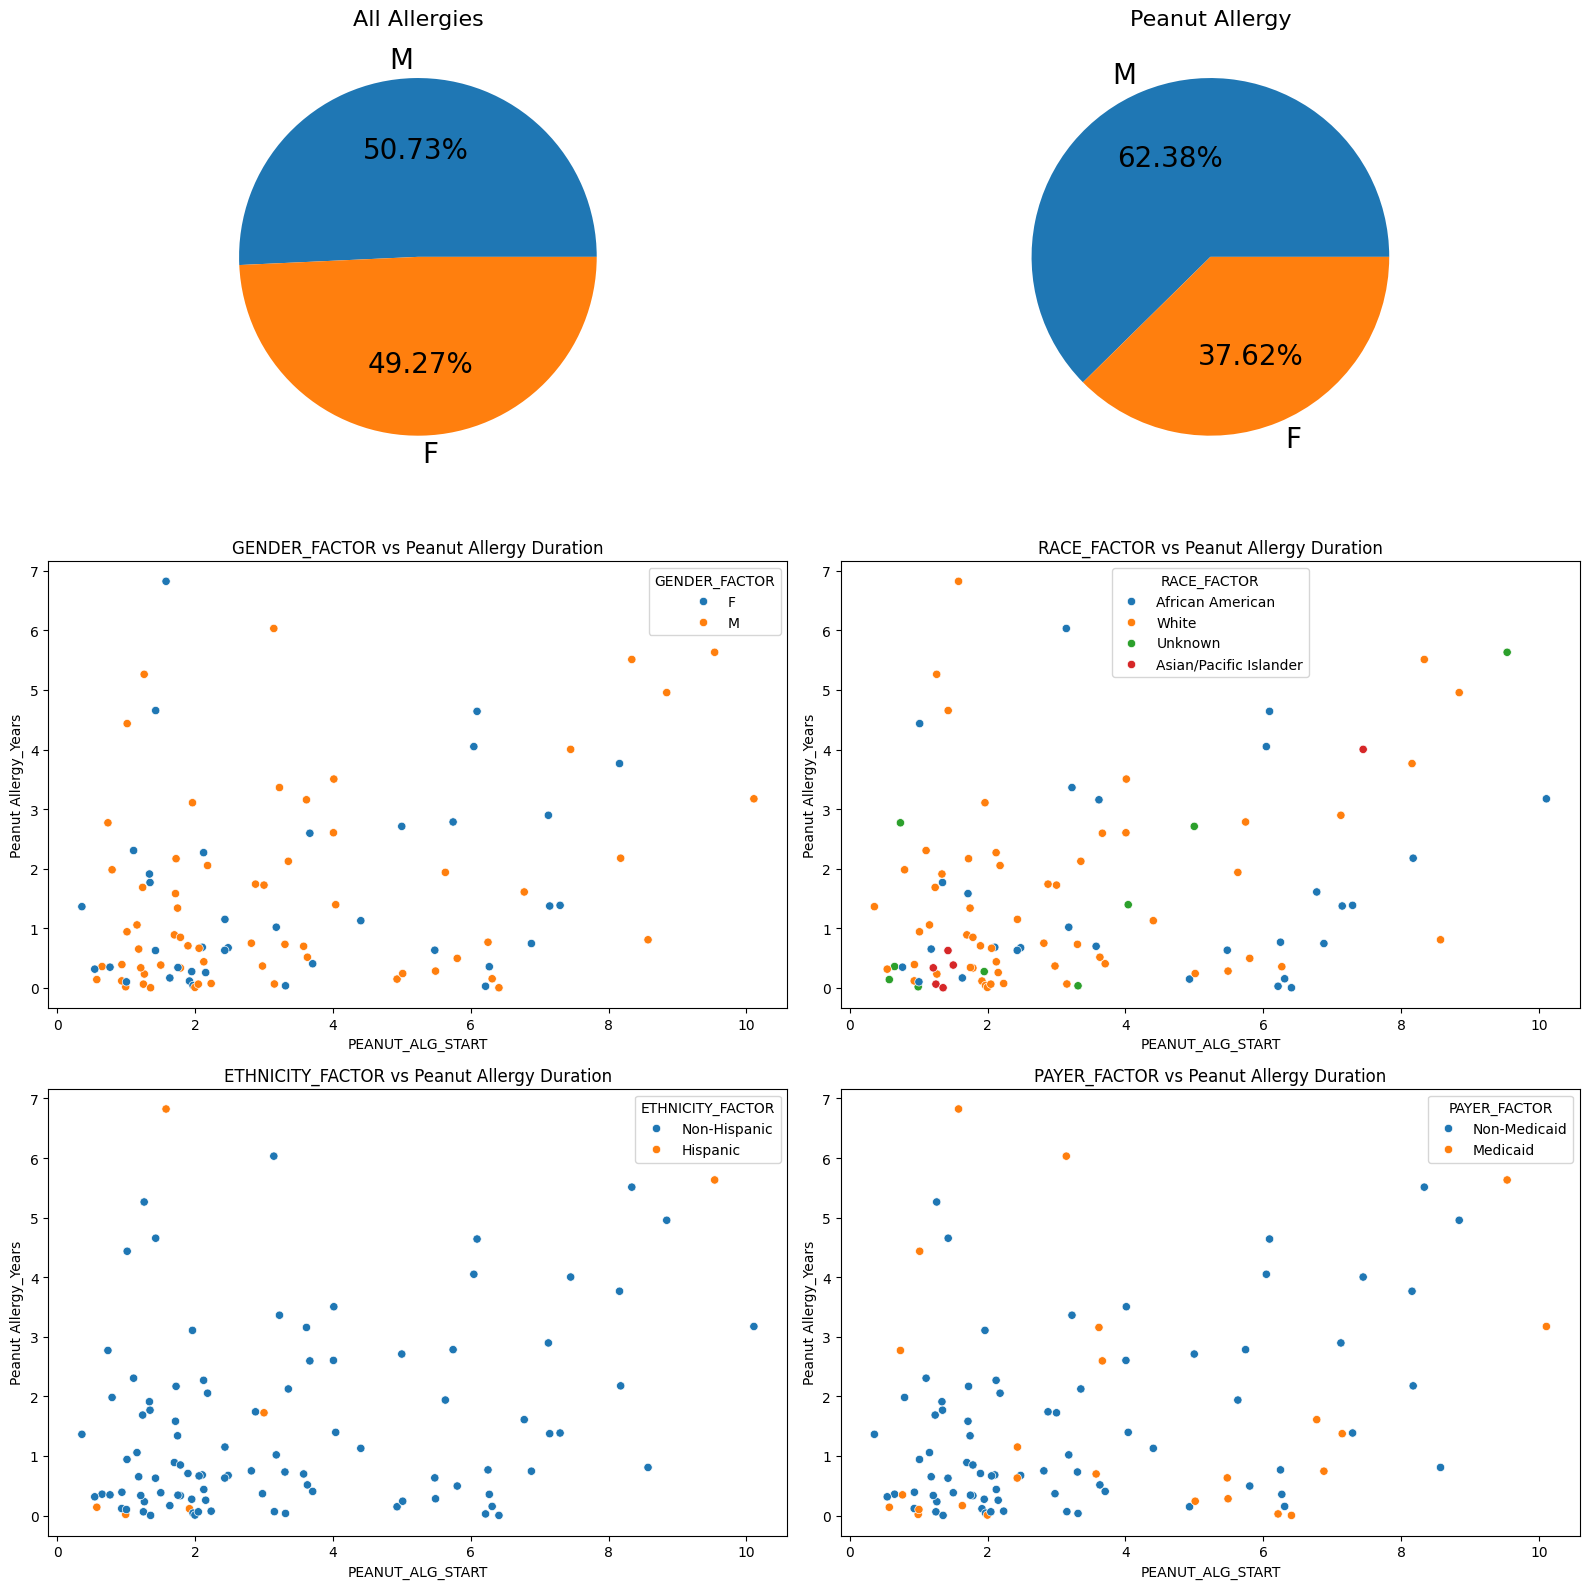

In [34]:
plot_allergy(df, 'PEANUT_ALG_START', 'PEANUT_ALG_END', allergy_name="Peanut Allergy")

# Pecan allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| PECAN_ALG_START         | Pecan allergy status at the start of the study.      | FLOAT64 |
| PECAN_ALG_END           | Pecan allergy status at the end of the study.        | FLOAT64 |

<!-- ![Pecan Allergy](./imgs/PecanAllergy.jpeg) -->

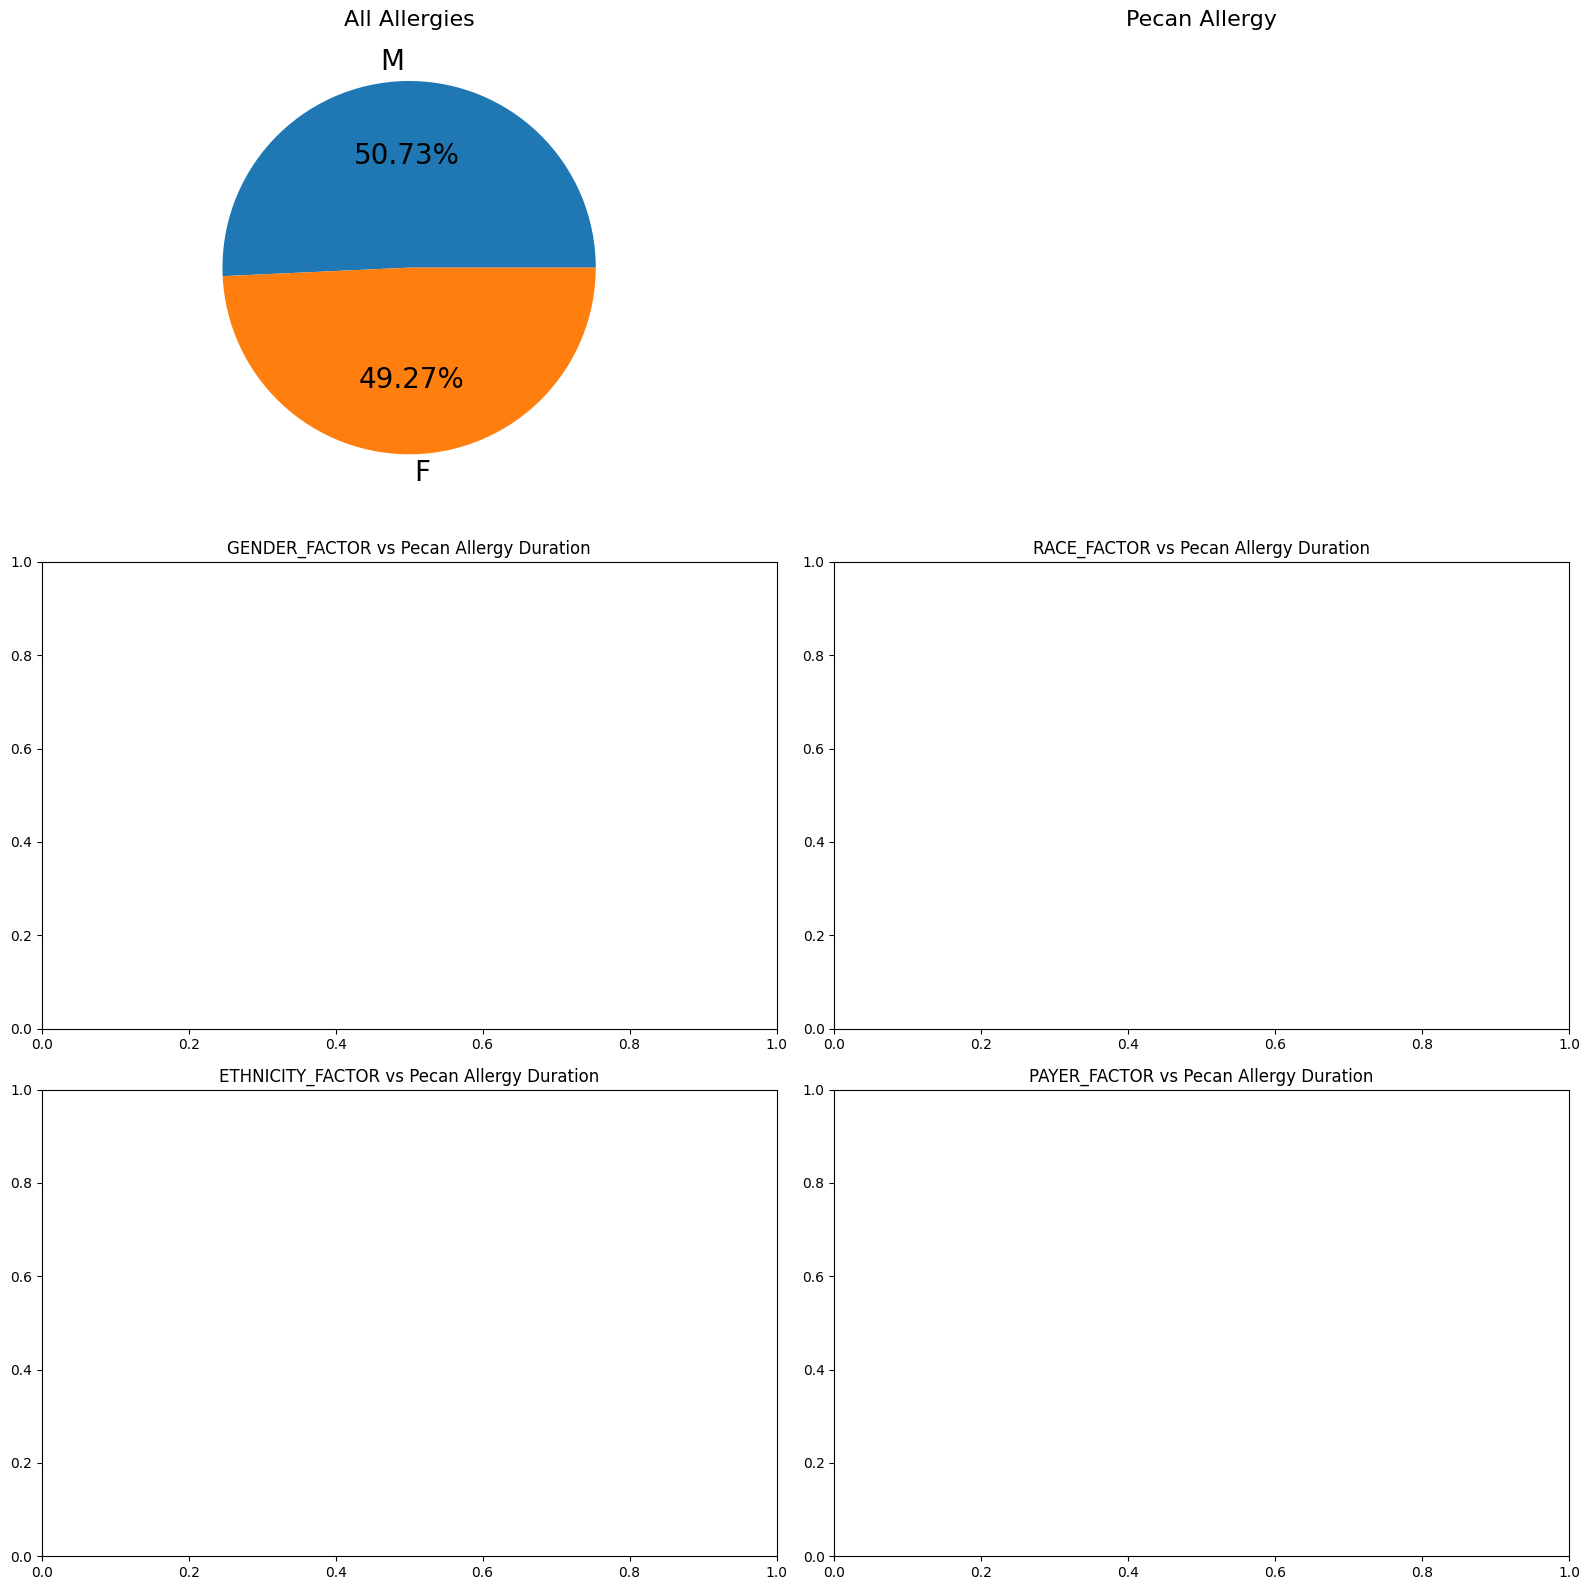

In [36]:
plot_allergy(df, 'PECAN_ALG_START', 'PECAN_ALG_END', allergy_name="Pecan Allergy")

# Pistach allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| PISTACH_ALG_START       | Pistachio allergy status at the start of the study.  | FLOAT64 |
| PISTACH_ALG_END         | Pistachio allergy status at the end of the study.    | FLOAT64 |

<!-- ![Pistach Allergy](./imgs/PistachAllergy.jpeg) -->

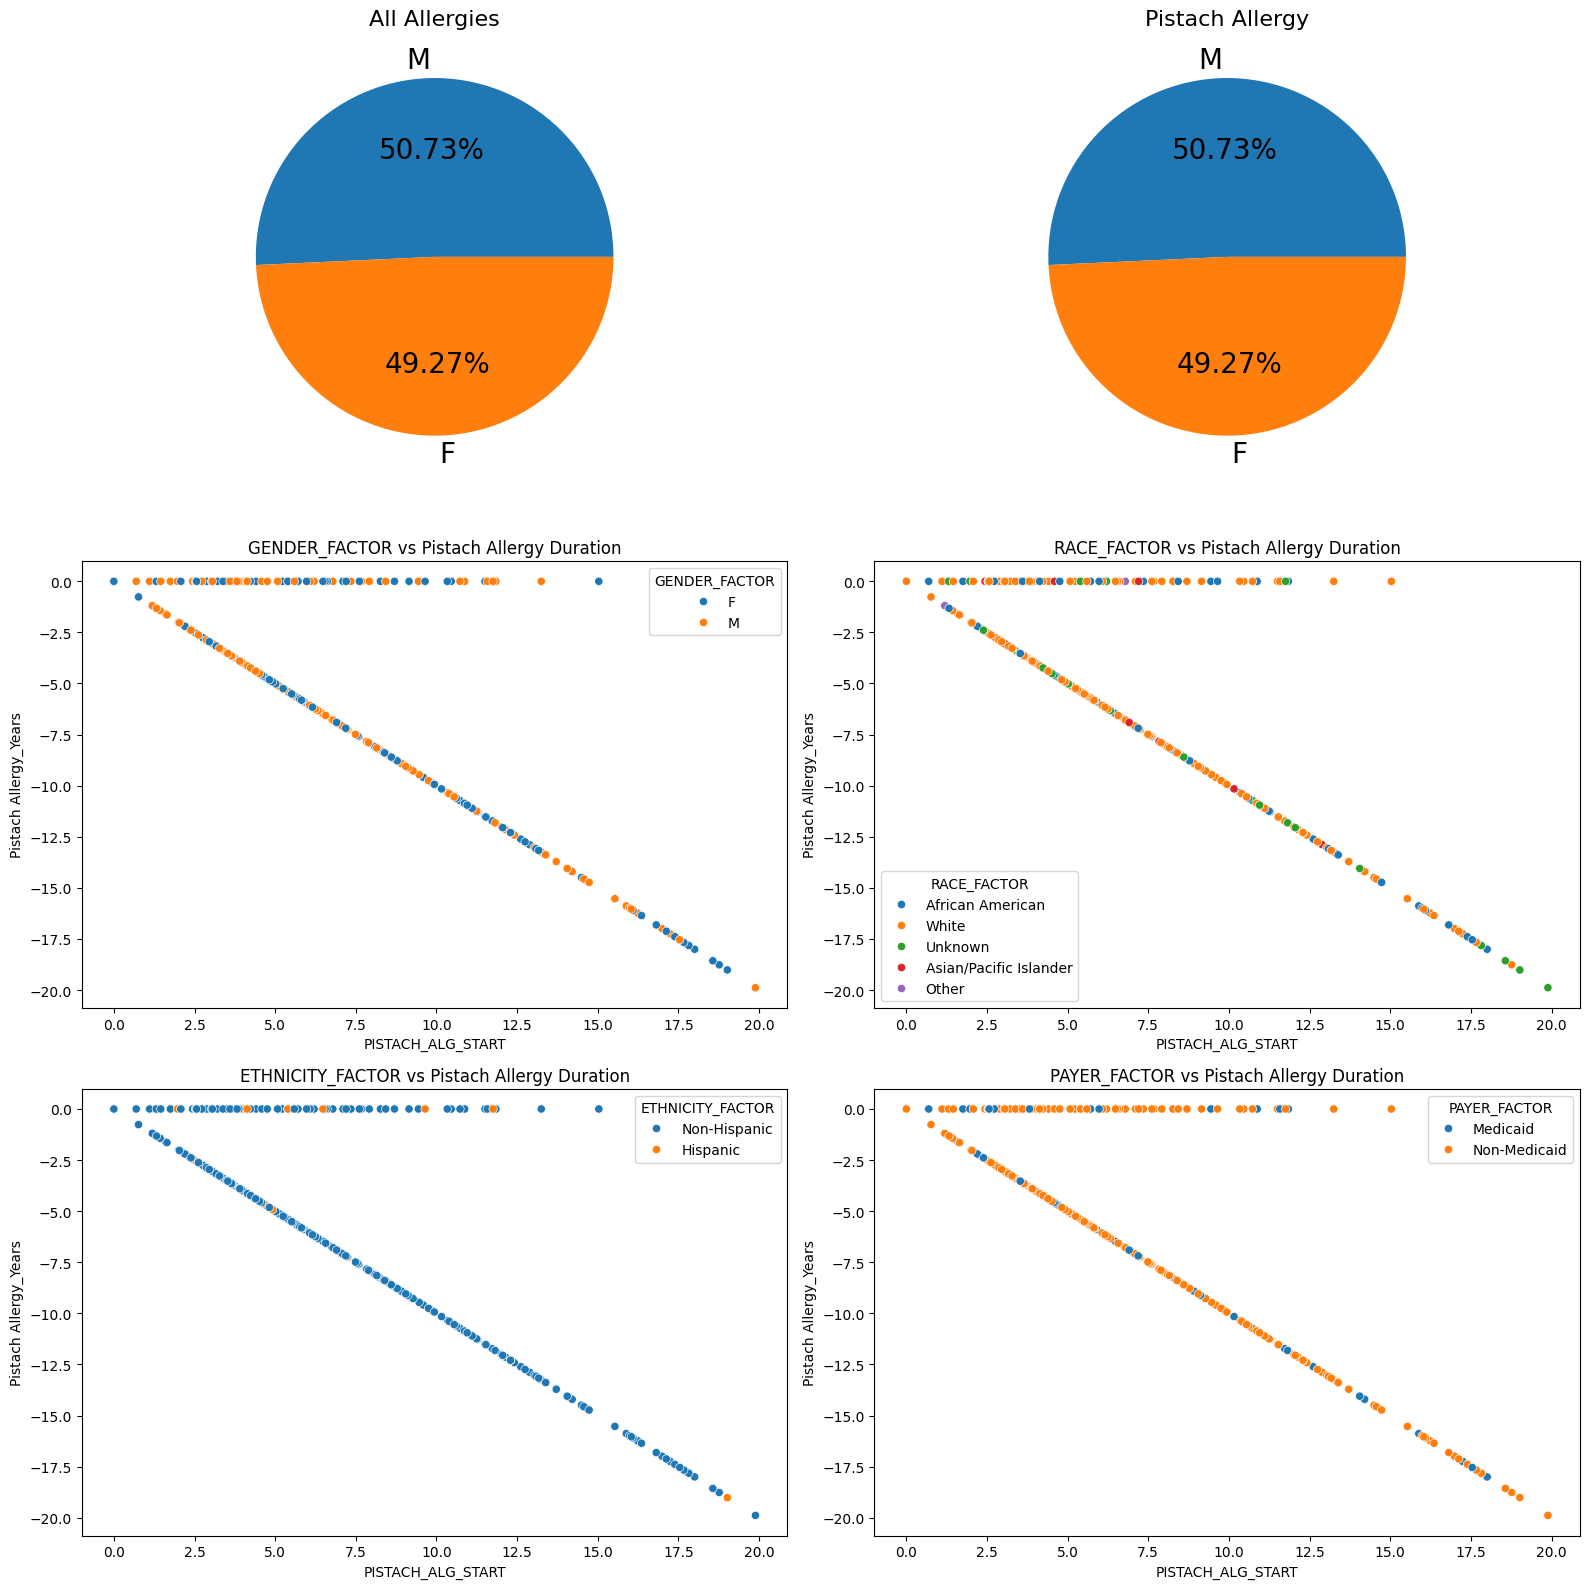

In [ ]:
plot_allergy(df, 'PISTACH_ALG_START', 'PISTACH_ALG_END', allergy_name="Pistach Allergy")

# Sesame allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| SESAME_ALG_START        | Sesame allergy status at the start of the study.     | FLOAT64 |
| SESAME_ALG_END          | Sesame allergy status at the end of the study.       | FLOAT64 |

<!-- ![Sesame Allergy](./imgs/SesameAllergy.jpeg) -->

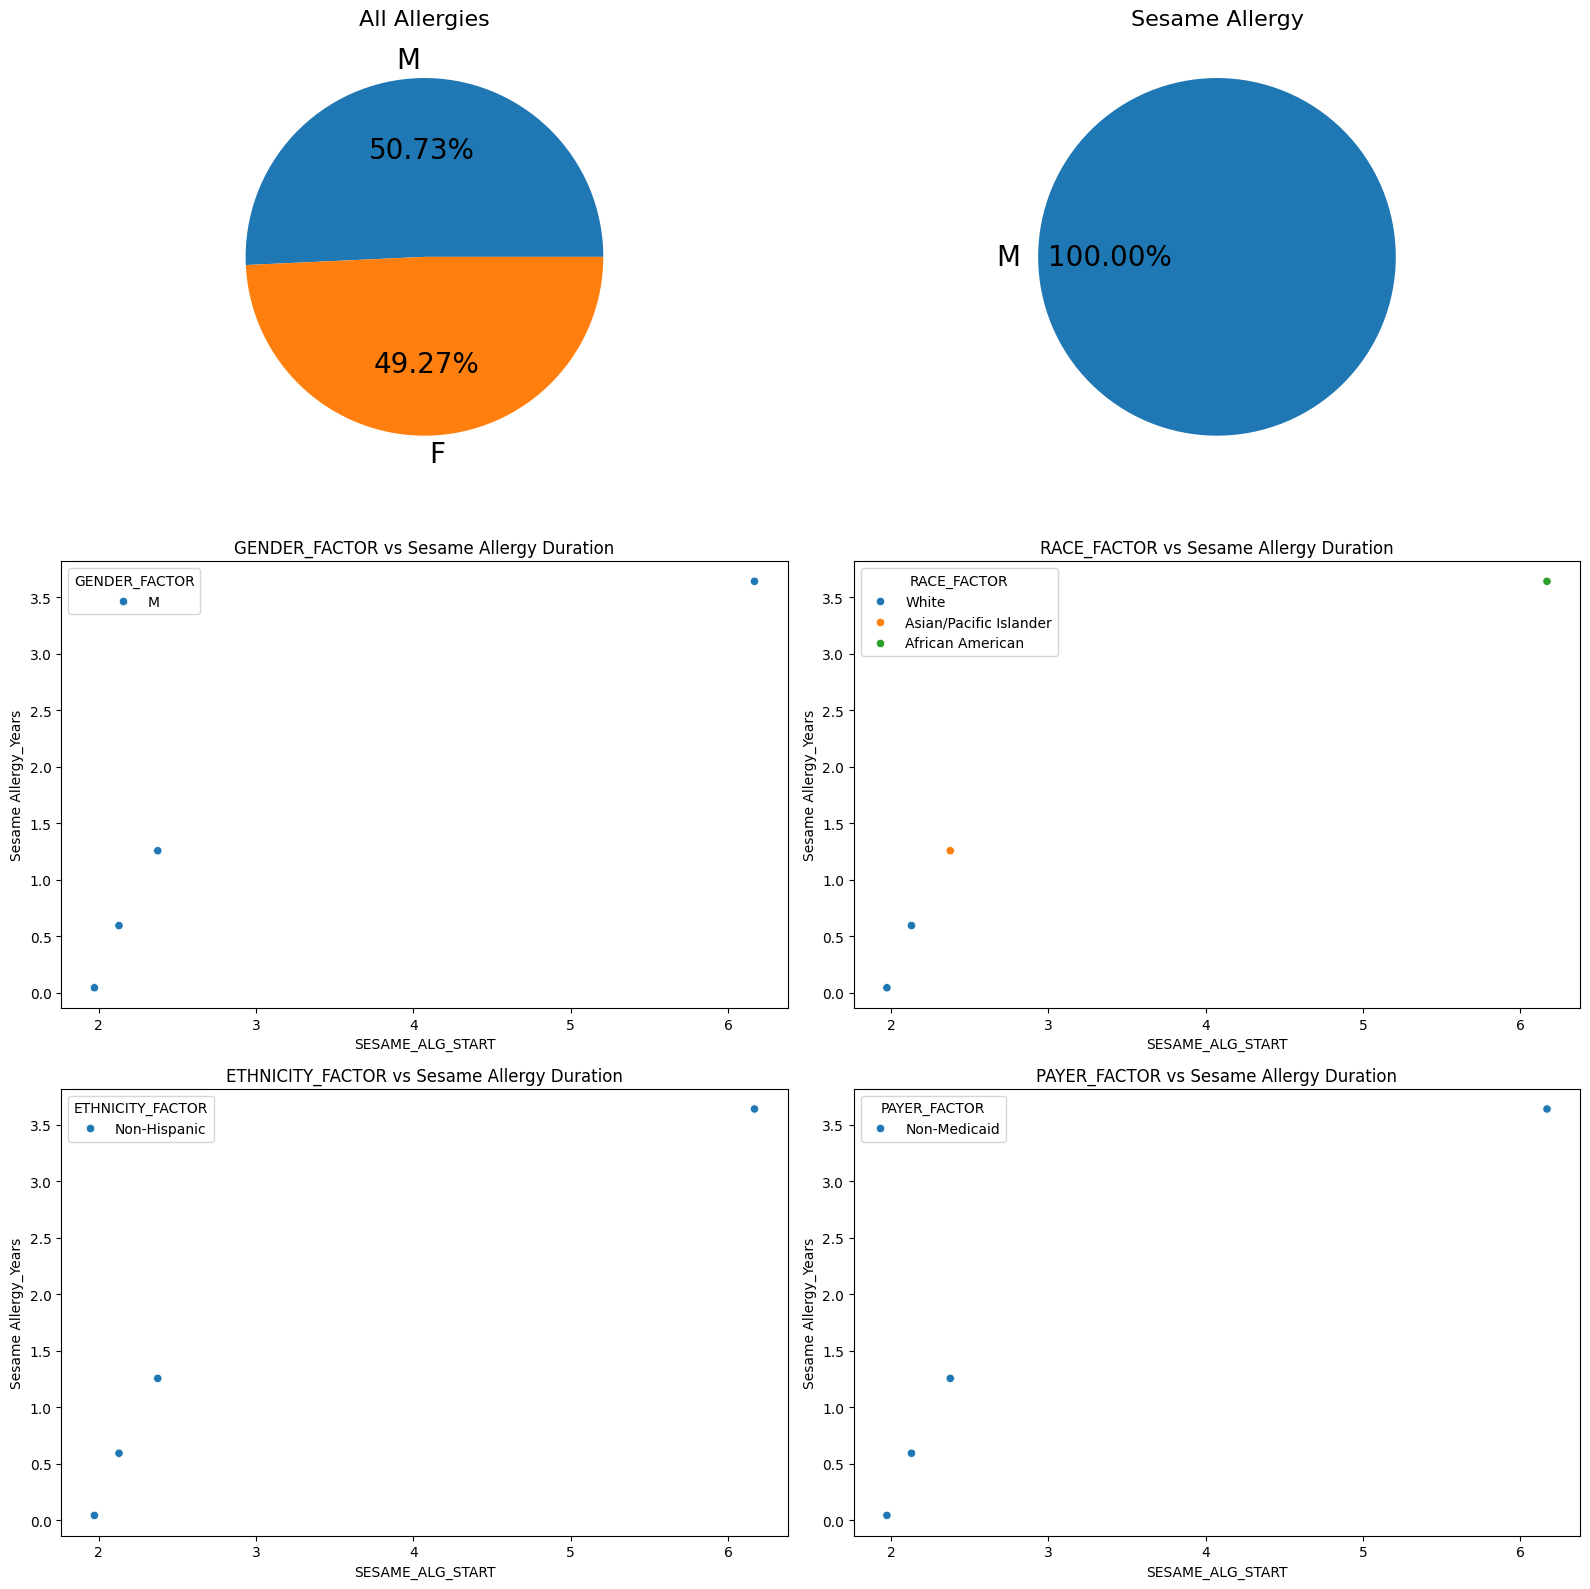

In [ ]:
plot_allergy(df, 'SESAME_ALG_START', 'SESAME_ALG_END', allergy_name="Sesame Allergy")

# Shellfish Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| SHELLFISH_ALG_START     | Shellfish allergy status at the start of the study.  | FLOAT64 |
| SHELLFISH_ALG_END       | Shellfish allergy status at the end of the study.    | FLOAT64 |

<!-- ![Shellfish Allergy](./imgs/ShellfishAllergy.jpg) -->

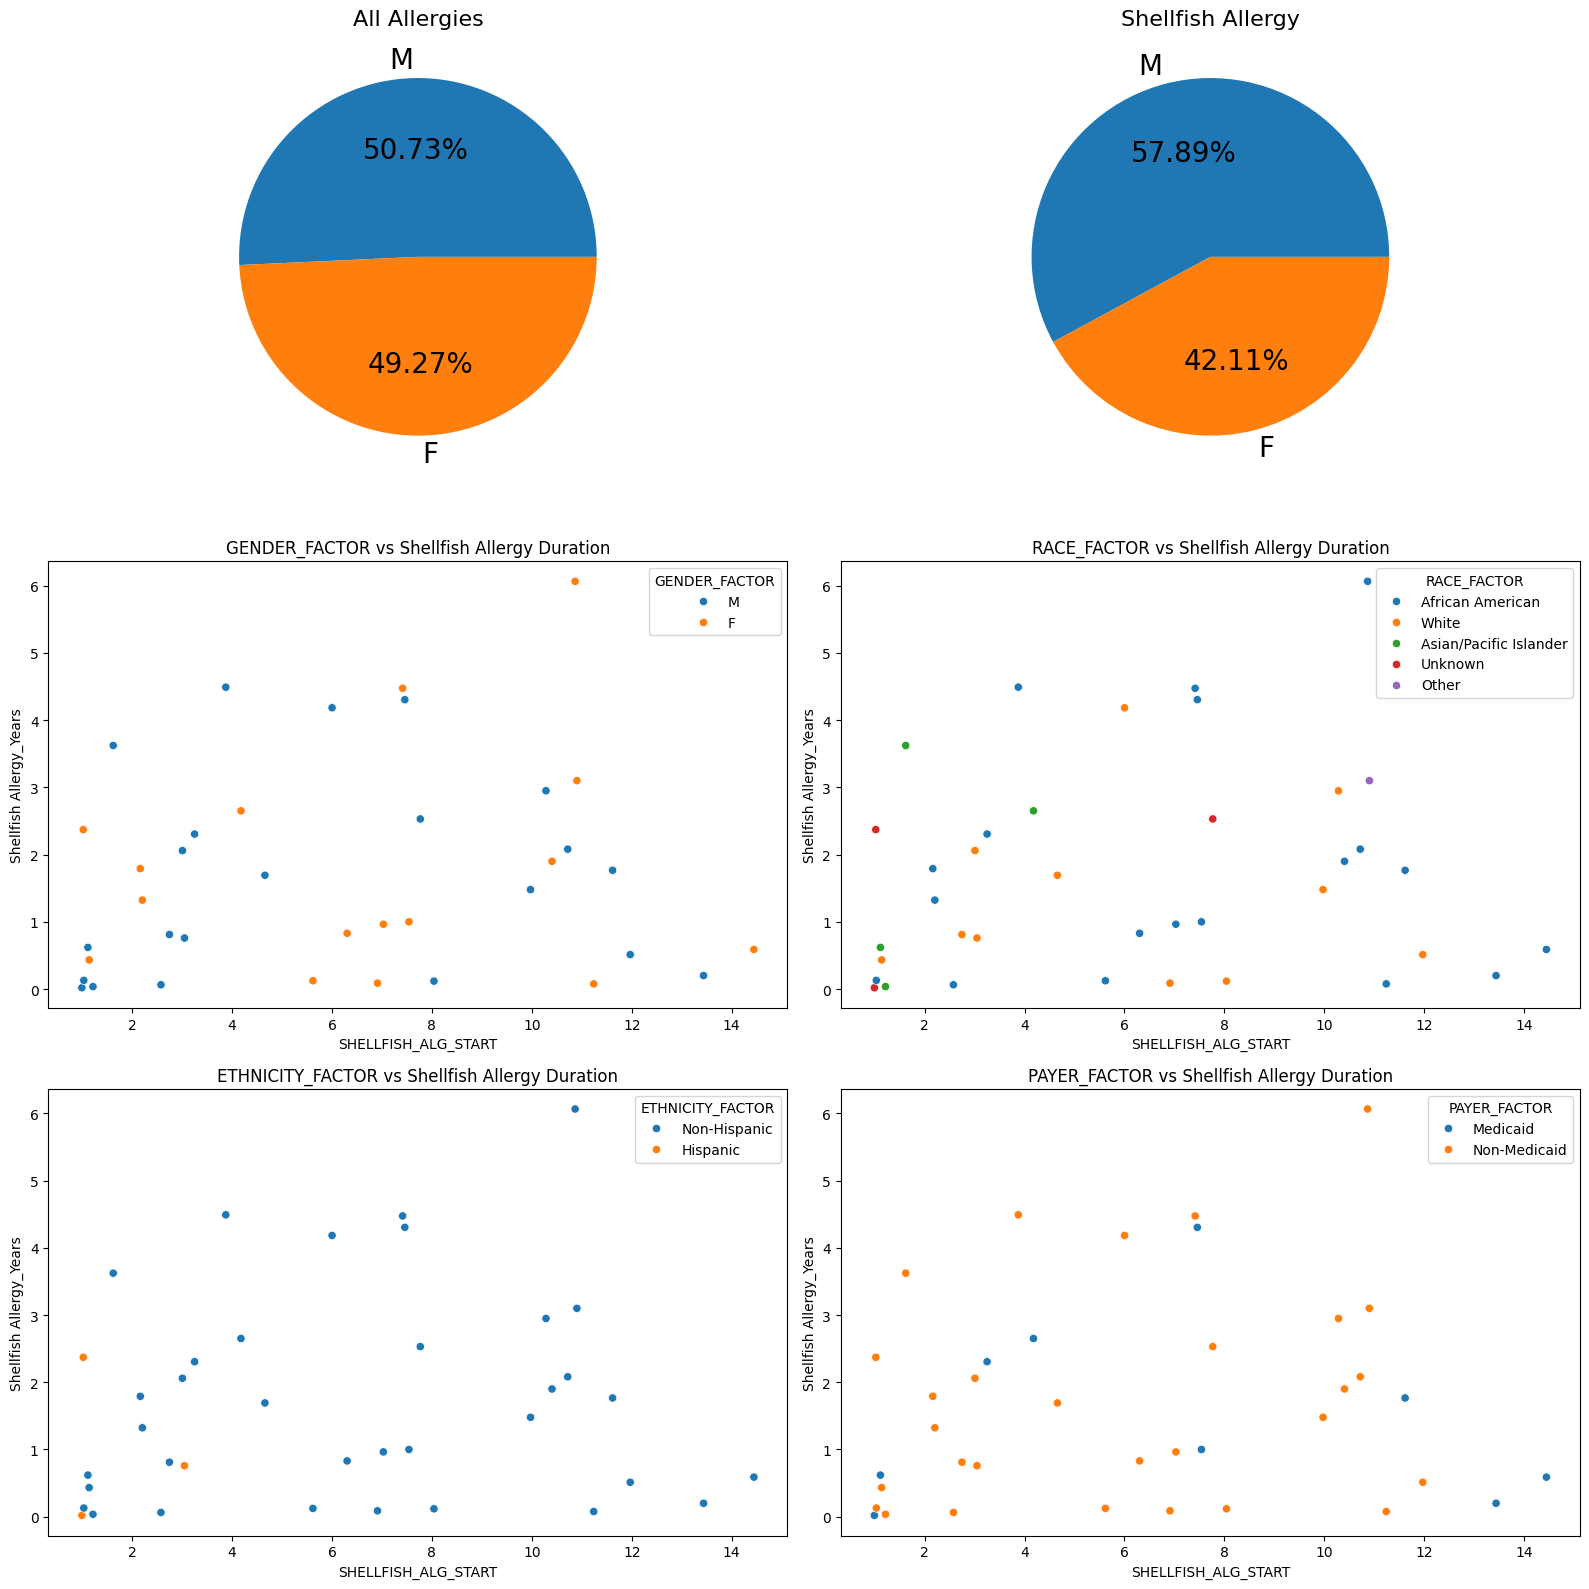

In [ ]:
plot_allergy(df, 'SHELLFISH_ALG_START', 'SHELLFISH_ALG_END', allergy_name="Shellfish Allergy")

# Soy Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| SOY_ALG_START           | Soy allergy status at the start of the study.        | FLOAT64 |
| SOY_ALG_END             | Soy allergy status at the end of the study.          | FLOAT64 |

<!-- ![Soy Allergy](./imgs/SoyAllergy.jpg) -->

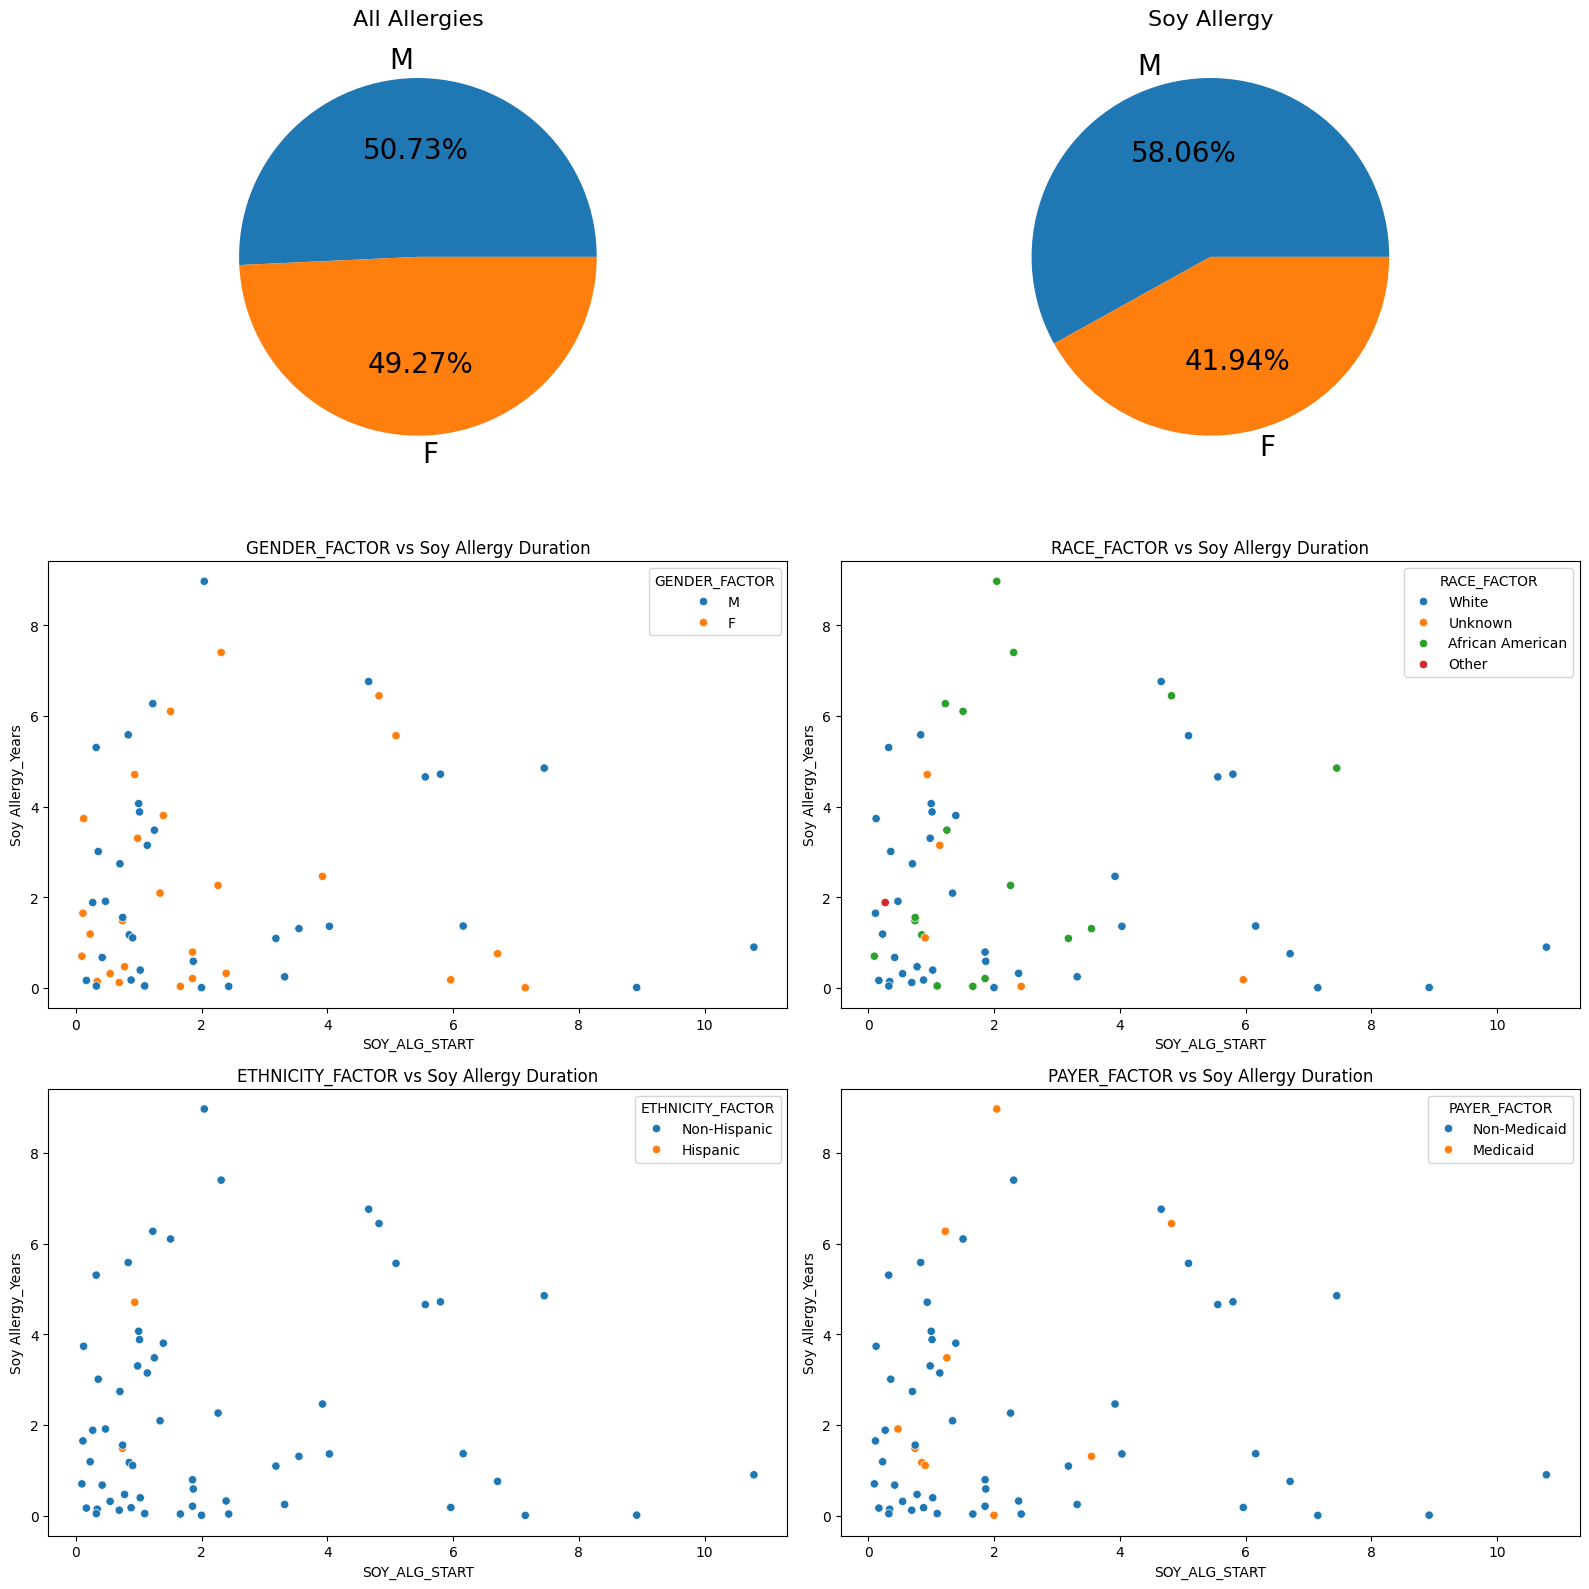

In [ ]:
plot_allergy(df, 'SOY_ALG_START', 'SOY_ALG_END', allergy_name="Soy Allergy")

# Treenut Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| TREENUT_ALG_START       | Tree nut allergy status at the start of the study.   | FLOAT64 |
| TREENUT_ALG_END         | Tree nut allergy status at the end of the study.     | FLOAT64 |

<!-- ![Treenut Allergy](./imgs/TreenutAllergy.jpg) -->

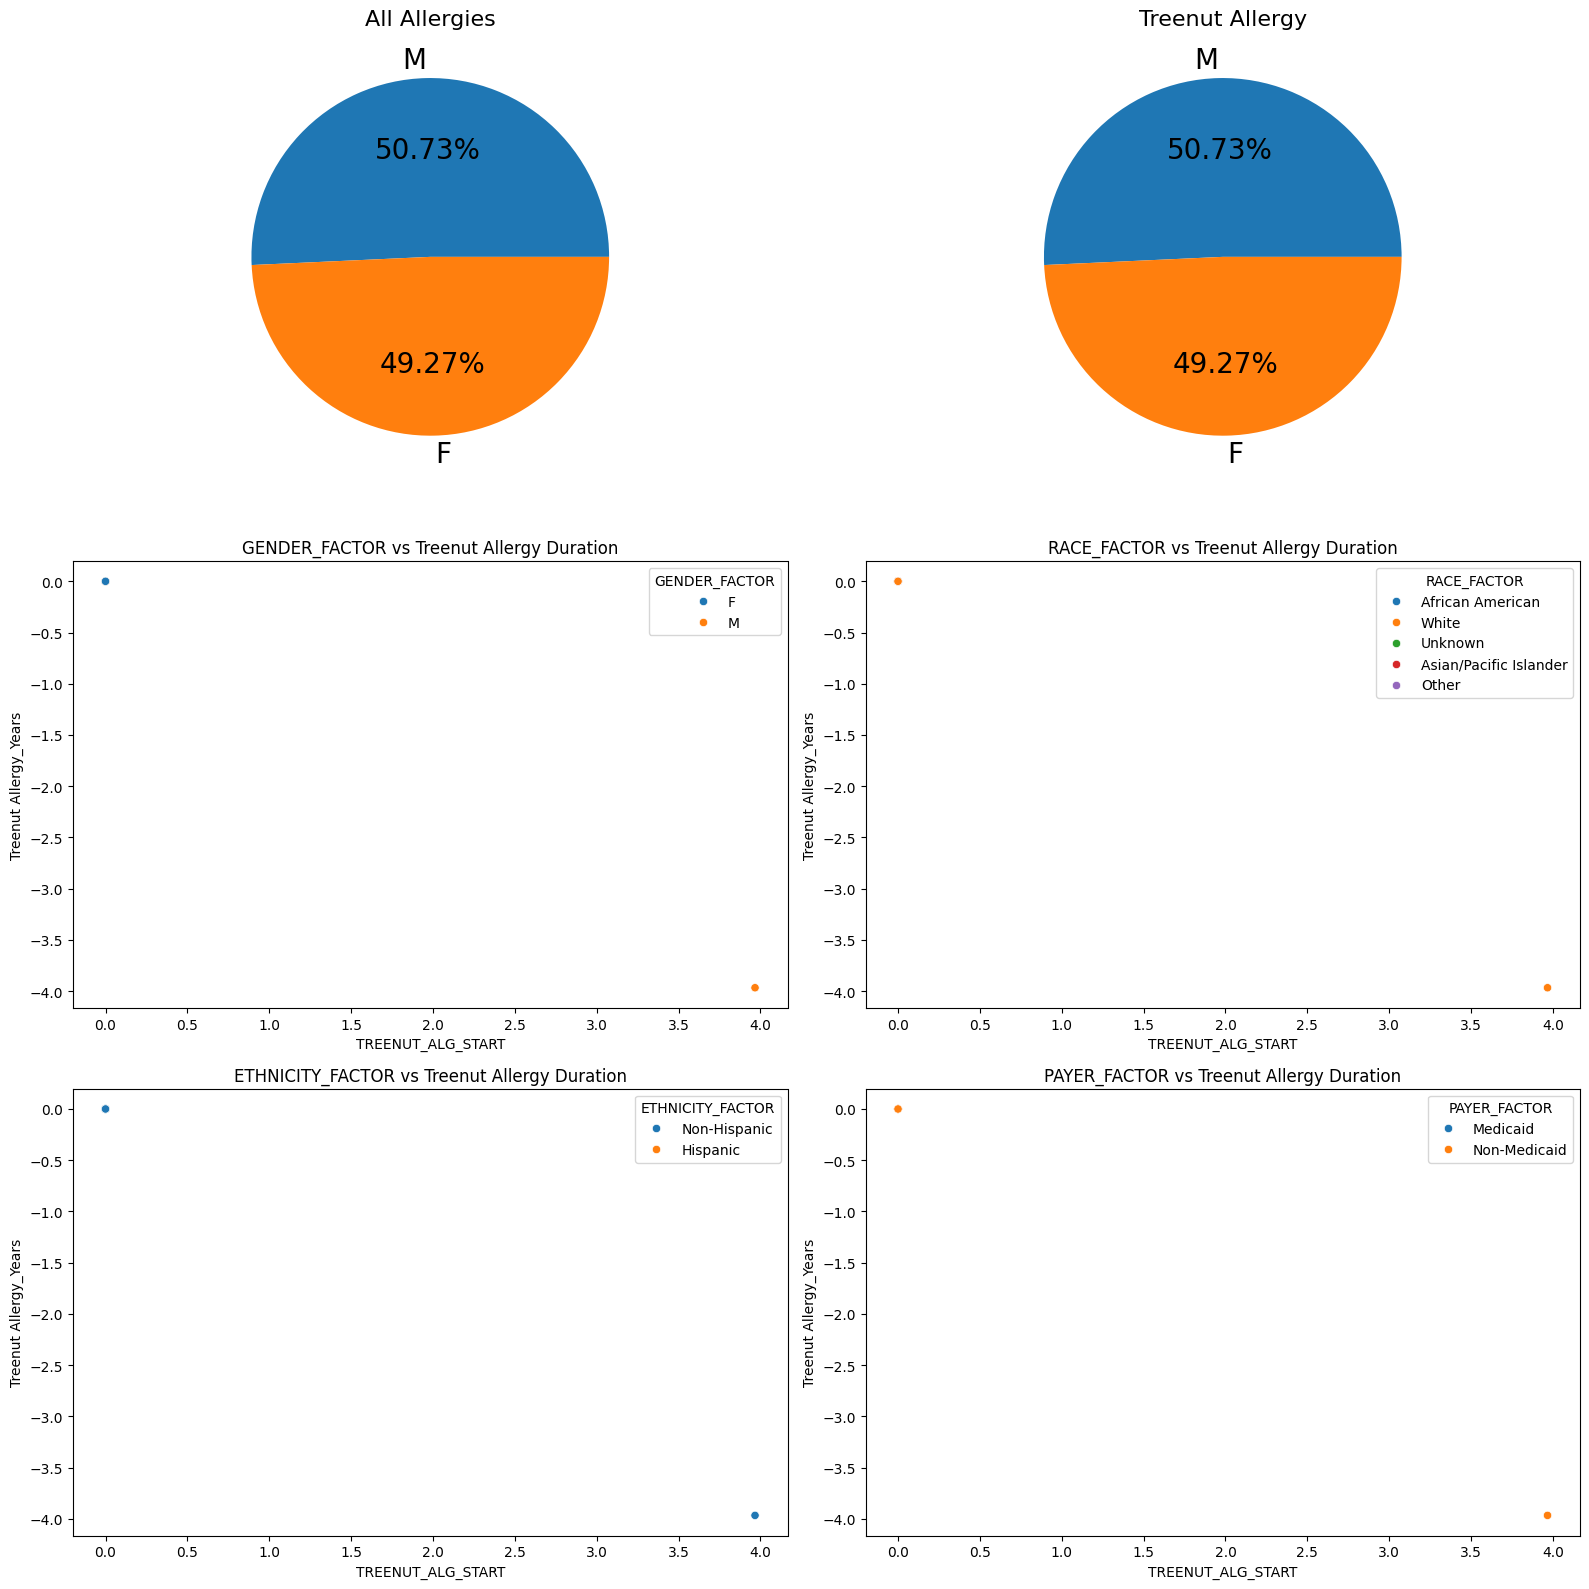

In [ ]:
plot_allergy(df, 'TREENUT_ALG_START', 'TREENUT_ALG_END', allergy_name="Treenut Allergy")

# Walnut Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| WALNUT_ALG_START        | Walnut allergy status at the start of the study.     | FLOAT64 |
| WALNUT_ALG_END          | Walnut allergy status at the end of the study.       | FLOAT64 |

<!-- ![Walnut Allergy](./imgs/WalnutAllergy.jpg) -->

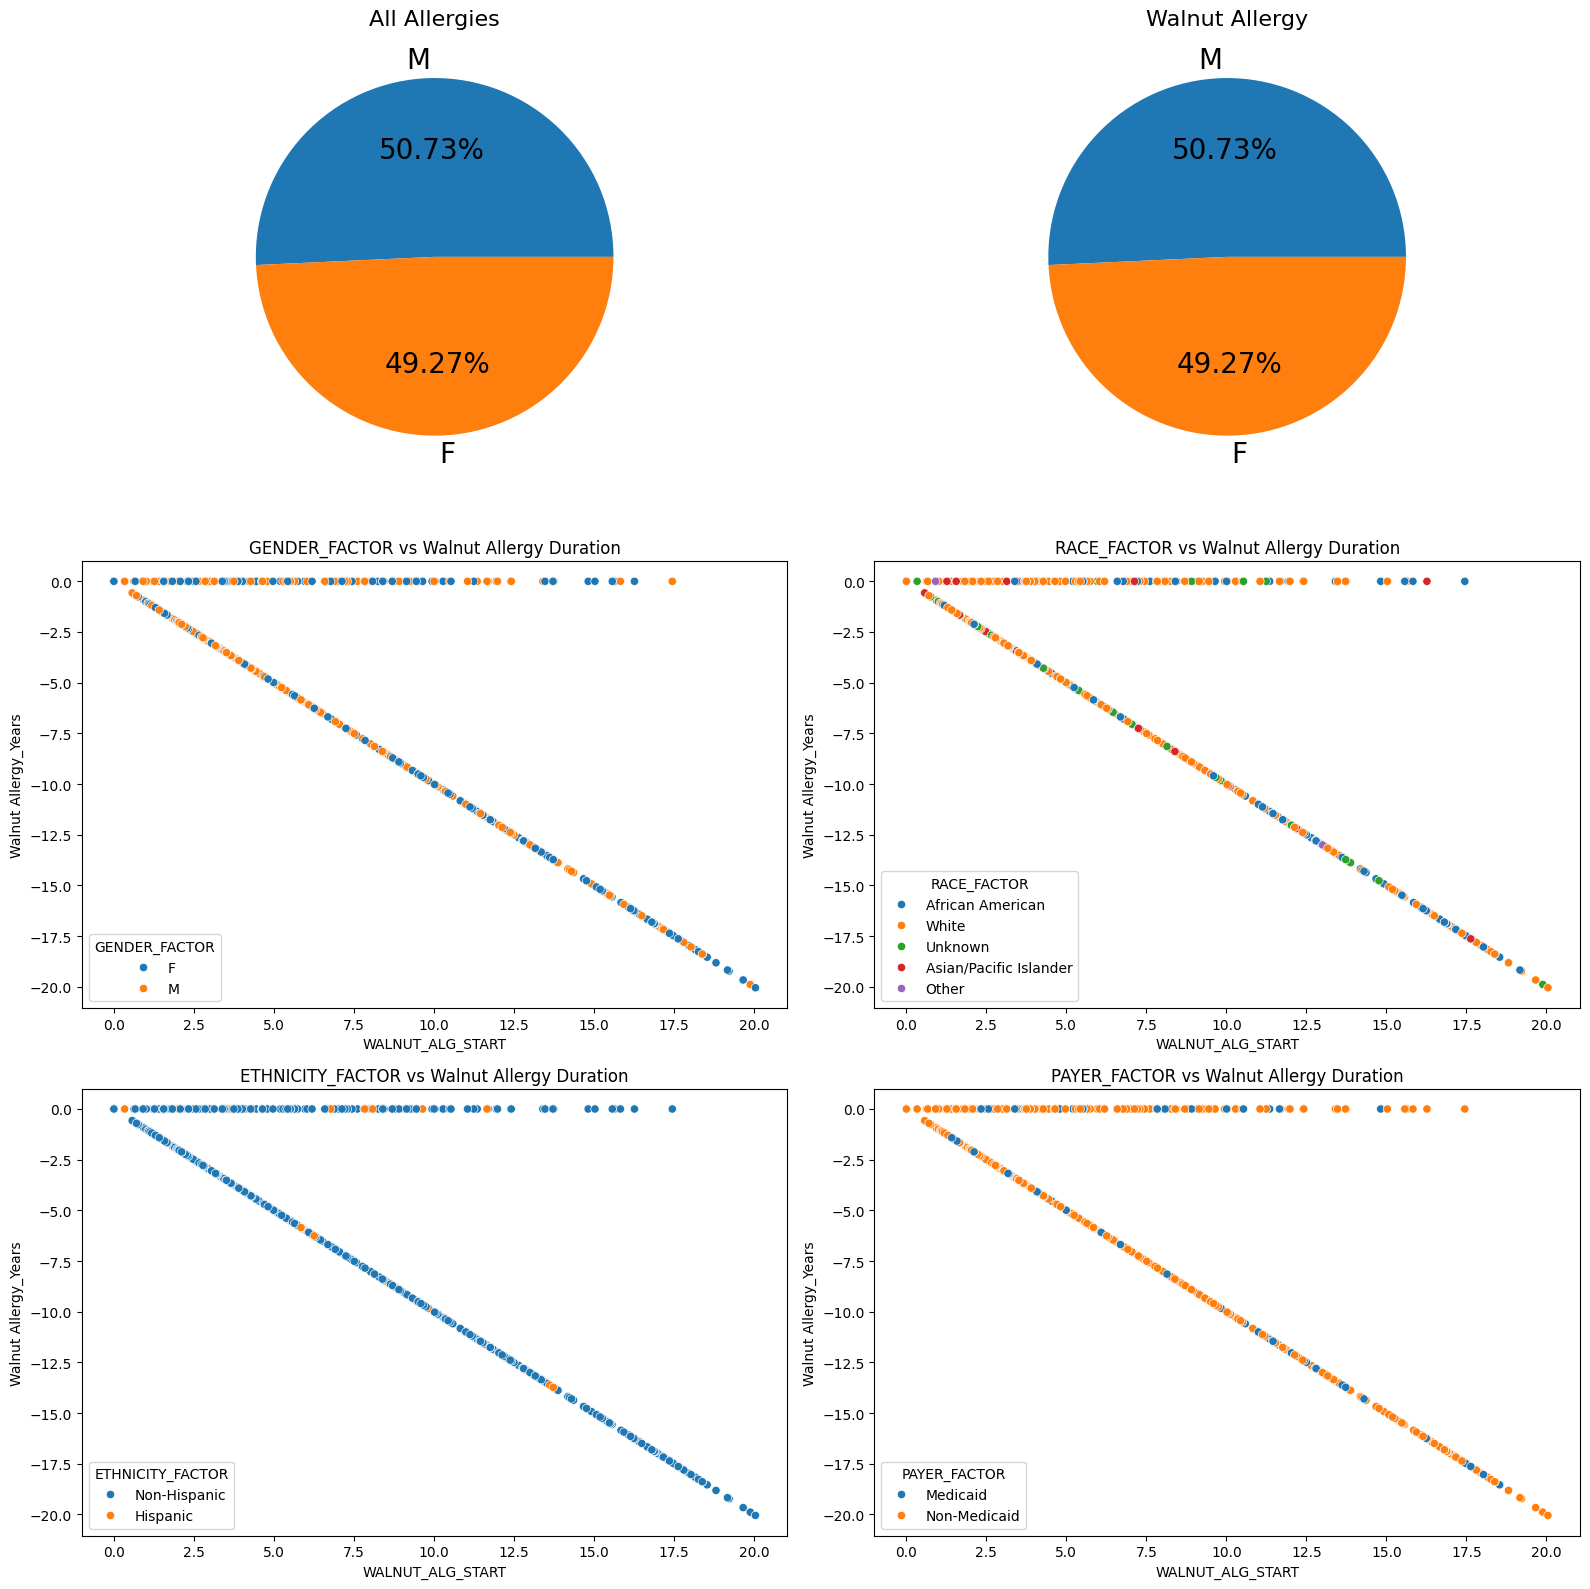

In [ ]:
plot_allergy(df, 'WALNUT_ALG_START', 'WALNUT_ALG_END', allergy_name="Walnut Allergy")

# Wheat Allergy

| Column name             | Description                                          | Type    |
| ----------------------- | ---------------------------------------------------- | ------- |
| WHEAT_ALG_START         | Wheat allergy status at the start of the study.      | FLOAT64 |
| WHEAT_ALG_END           | Wheat allergy status at the end of the study.        | FLOAT64 |

<!-- ![Wheat Allergy](./imgs/WheatAllergy.jpg) -->

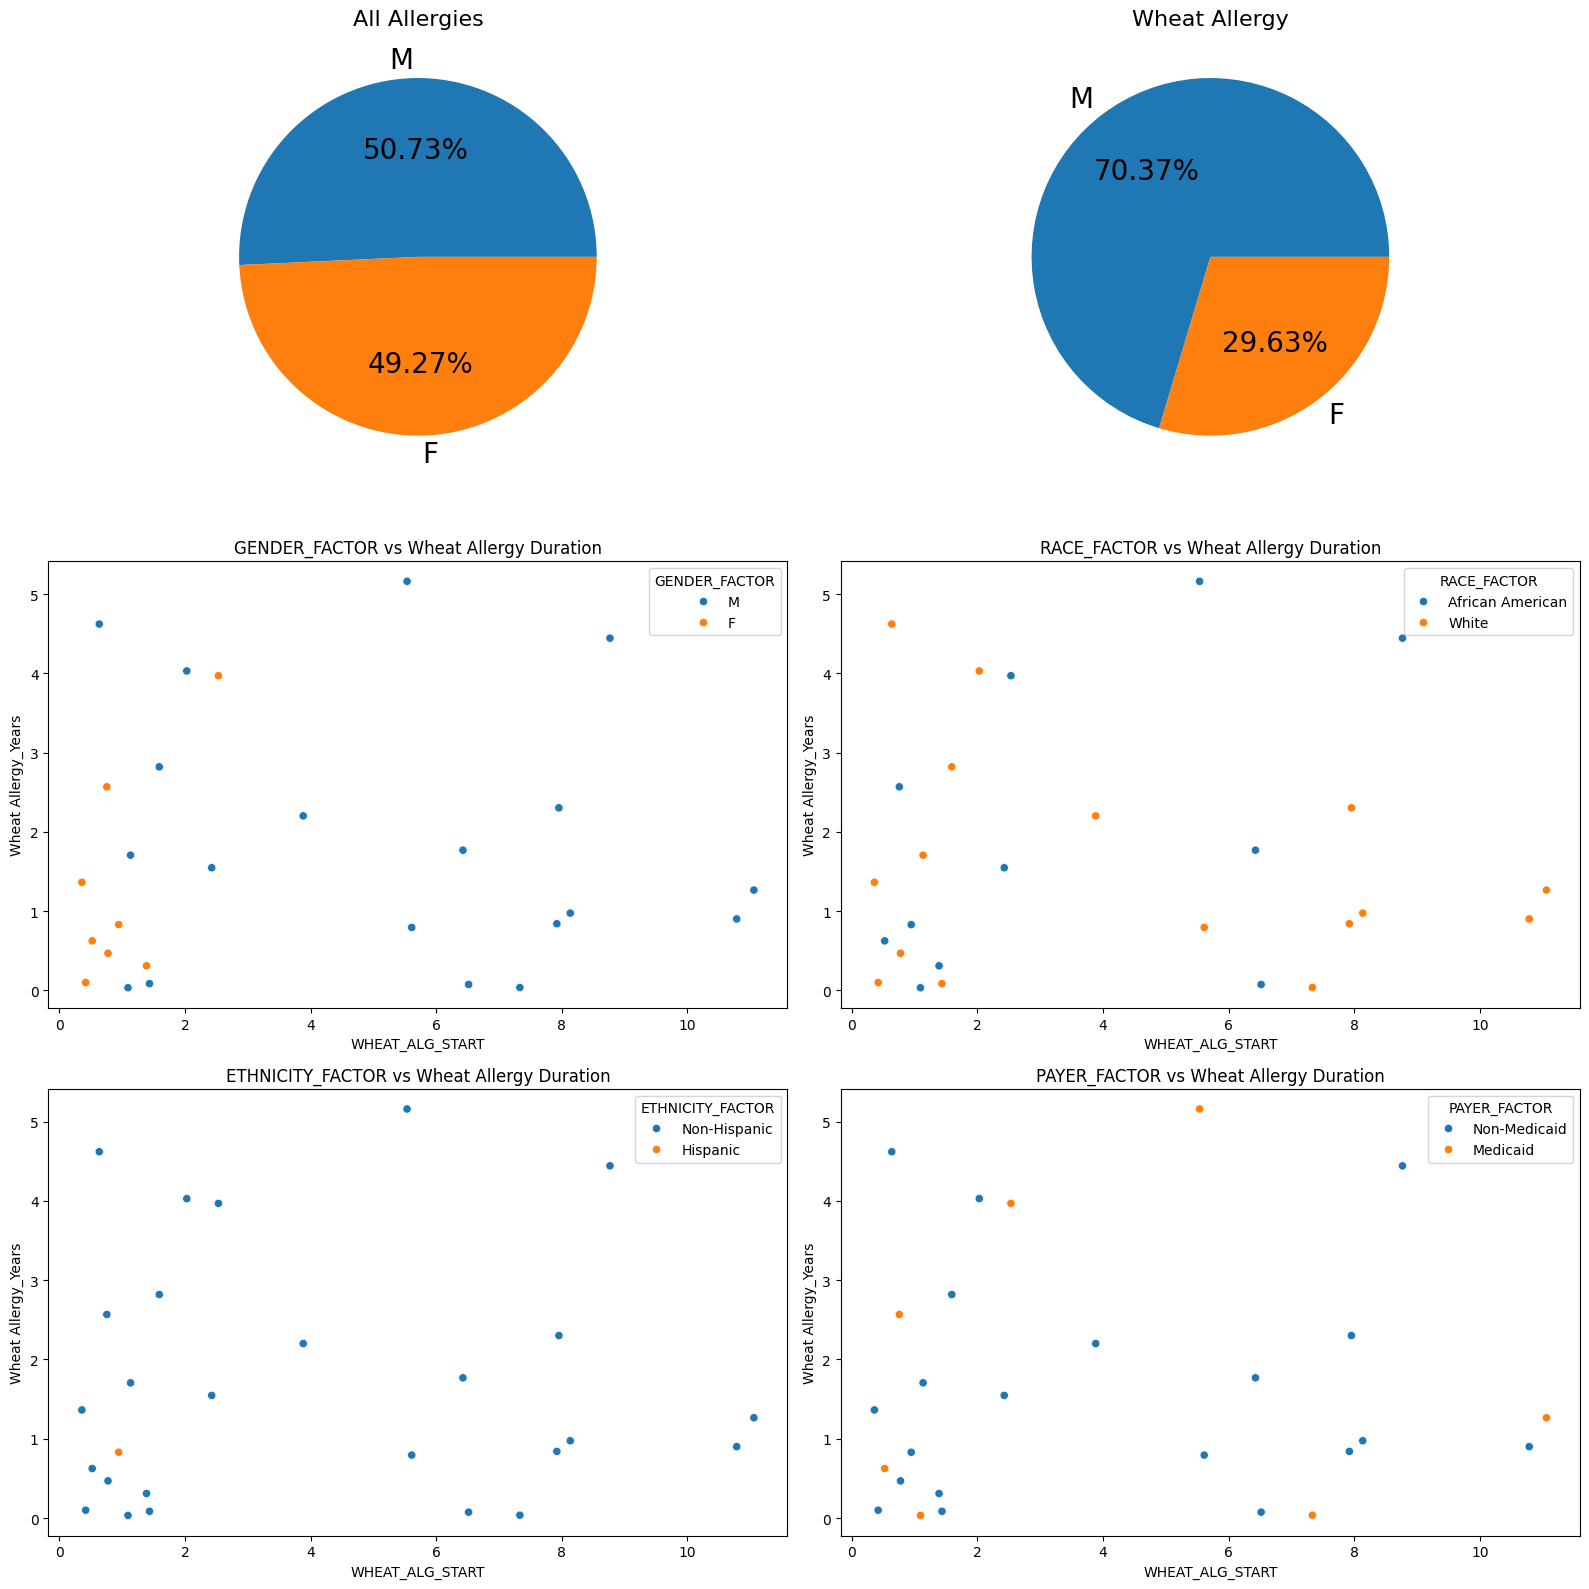

In [ ]:
plot_allergy(df, 'WHEAT_ALG_START', 'WHEAT_ALG_END', allergy_name="Wheat Allergy")

## 1.2 Feature Importance Analysis

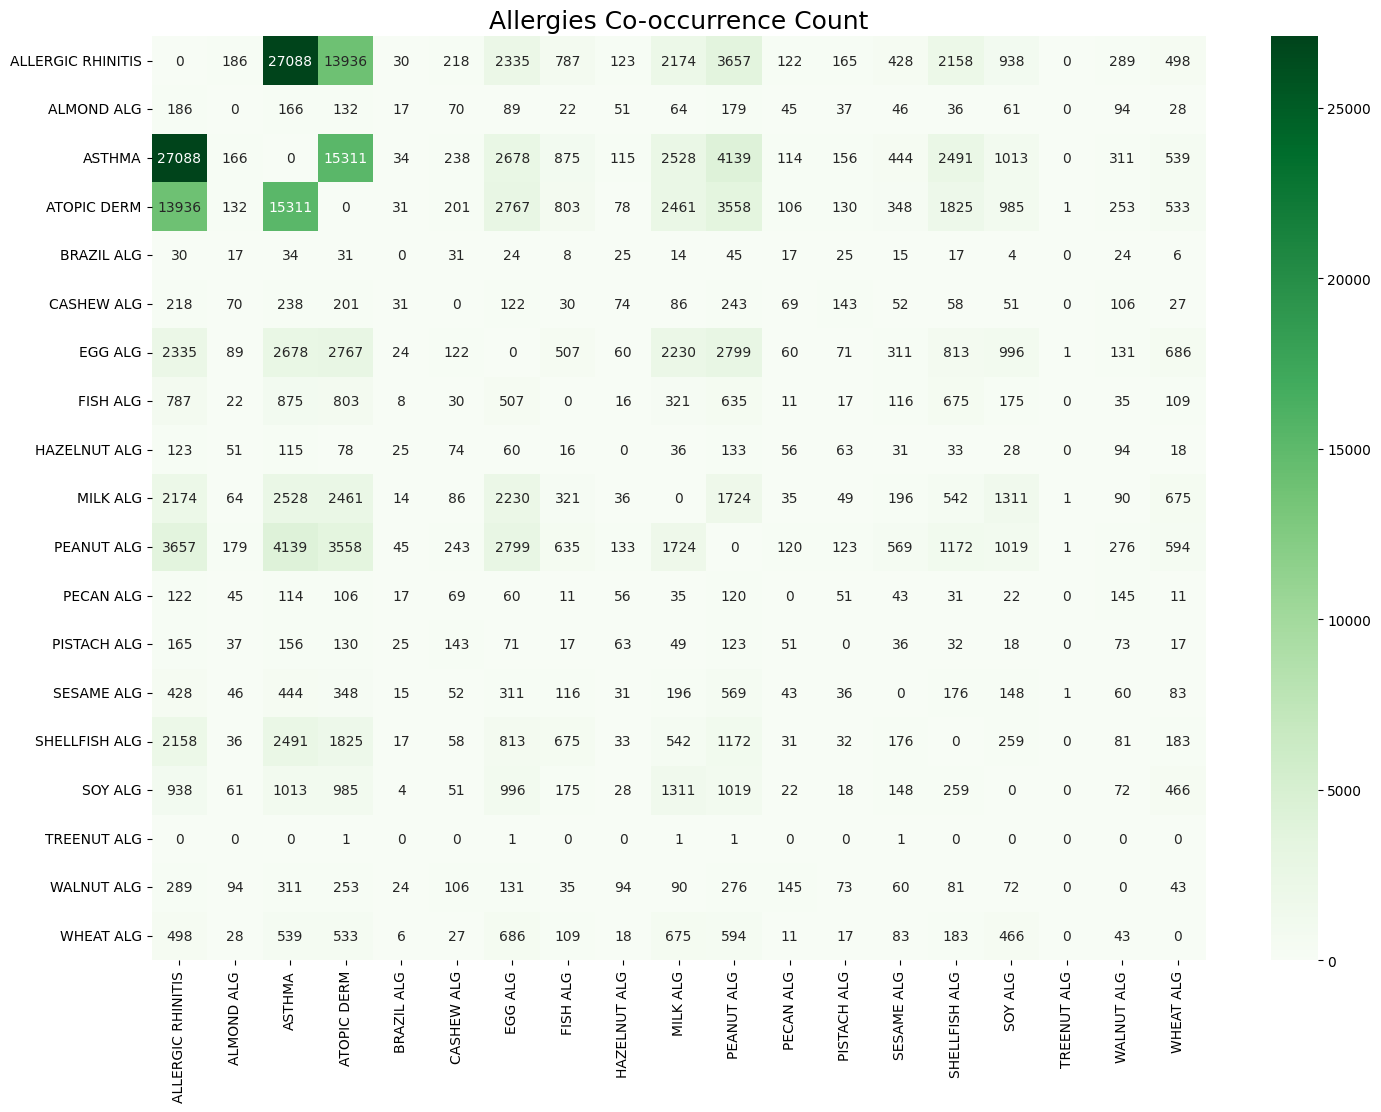

In [ ]:
cooc_count = has_allergy.drop(columns='SUBJECT_ID')
cooc_count = cooc_count.T.dot(cooc_count)

# zero out diagonal (self-co-occurrence)
cooc_count.values[np.arange(cooc_count.shape[0]), np.arange(cooc_count.shape[0])] = 0

plt.figure(figsize=(17, 12))
sns.heatmap(cooc_count, annot=True, fmt='d', cmap='Greens')
plt.title('Allergies Co-occurrence Count', fontsize=18)
plt.show()

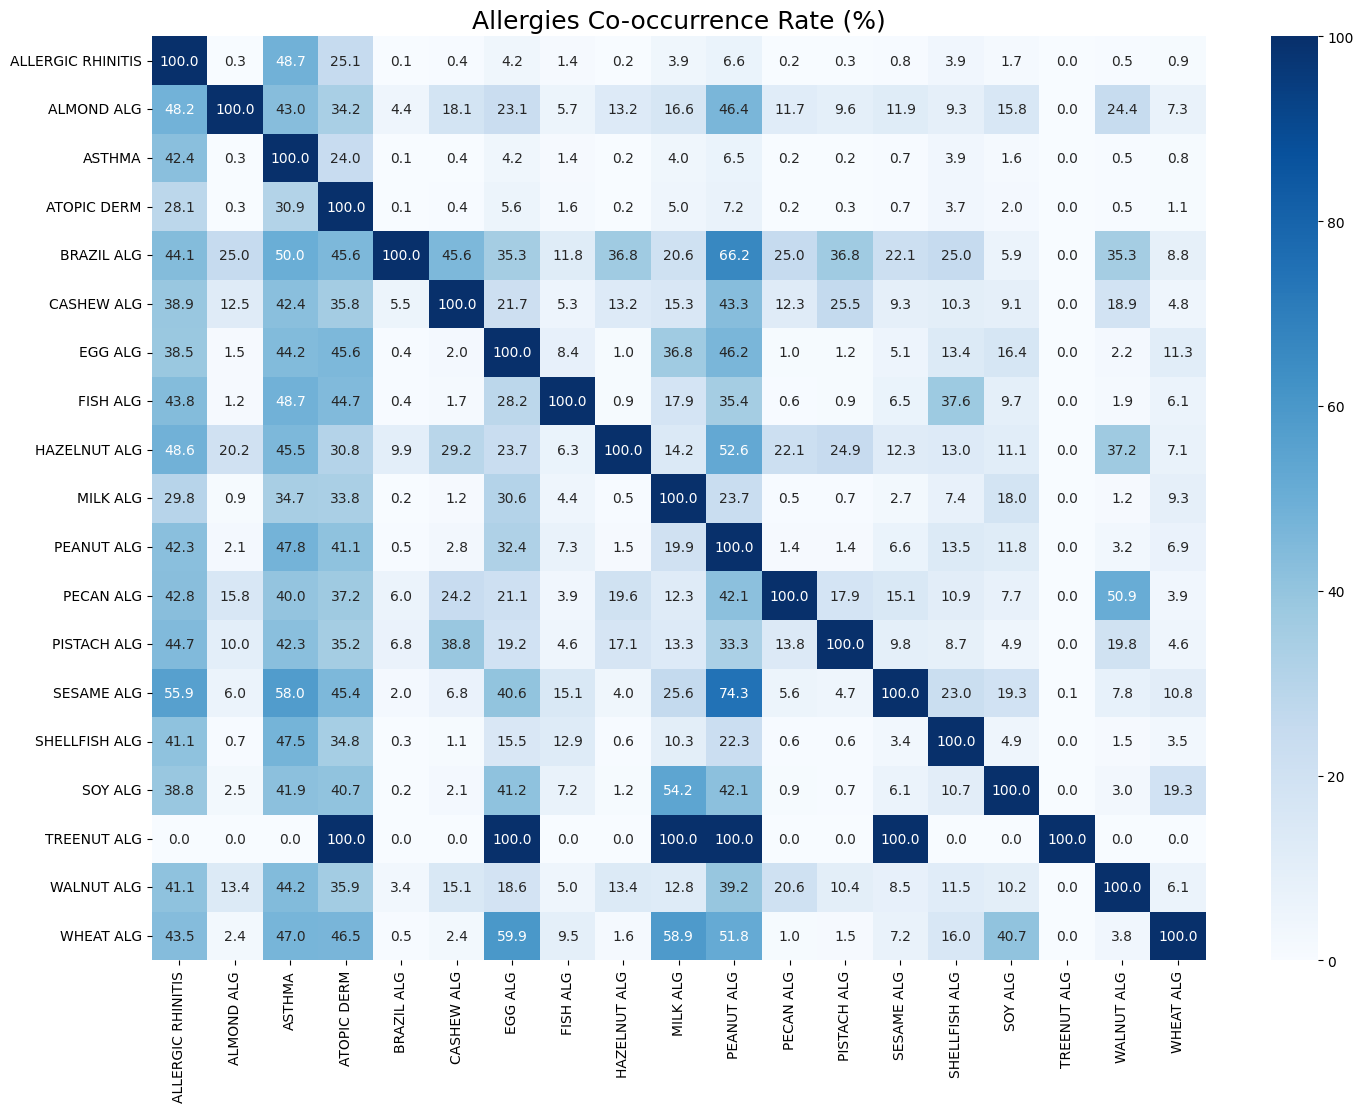

In [ ]:
cooc_rate = cooc_count.divide(allergy_summary.sort_values(by='Allergy')['Count'].values, axis=0)

# Fill diagonal with value 1
cooc_rate.values[np.arange(cooc_rate.shape[0]), np.arange(cooc_rate.shape[0])] = 1

# Convert to percentage
cooc_rate = cooc_rate * 100

plt.figure(figsize=(17, 12))
sns.heatmap(cooc_rate, annot=True, fmt='.1f', cmap='Blues')
plt.title('Allergies Co-occurrence Rate (%)', fontsize=18)
plt.show()